# Item2Vec
In this notebook, we demonstarte how to learn embeddigns for items (products) from transactional data using Word2Vec. Orders are interpreted as sentences and product are interpreted as words.

### Data
We use an external dataset from the Instacart Market Basket Analysis competition (see `datasets.md/Instacart`). Please download and unzip the dataset to `data` folder before running this notebook.

### References
1. Barkan O., Koenigstein N. -- Item2Vec: Neural Item Embedding for Collaborative Filtering, 2016
1. Arora S., Warrier D. -- Decoding Fashion Contexts Using Word Embeddings, 2016

# Import modules

In [1]:
from item2vec import DATA_PATH, MODEL_DIR, Item2Vec
from gensim.models import Word2Vec
import multiprocessing as mp
import os

print('Number of CPU cores:', mp.cpu_count())
from IPython.display import display

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import pairwise_distances

WORD_DIM = 200
NAME = f'item2vec_{WORD_DIM}d.model'
UPDATE_MODEL = True

path = os.path.join(os.getcwd(), 'data', 'shwapno')

Number of CPU cores: 16


# Feed into item2vec model

In [2]:
if UPDATE_MODEL:
    model = Item2Vec(data_path=path, window=5, vector_size=WORD_DIM, workers=mp.cpu_count() - 2, min_count=20, epochs=20)
    model.train()
    model.save(os.path.join(MODEL_DIR, NAME))
else:
    model = Item2Vec.load('./models/item2vec_200d.model')


rand_prod = model.data['invoice_details'].ProductCode.unique().tolist()
for product_id in rand_prod[:2]:
    print(f"The top 10 similar products to the products {product_id}:")
    try:
        display(model.most_similar_readable(product_id, topn=10))
    except:
        pass
# invoice_details = data['invoice_details']

The top 10 similar products to the products 2809267:


,product,ProductCode,similarity
0,Olympic Butter Bite Biscuits 73g,2809267,1.000000
1,S201047 R_FOOD COVER 35cm,3810656,0.375183
2,BD Food Dry Cake Biscuit 130g,2814943,0.348153
3,Lifebuoy Hand Sanitizer Total 10 50ml,3016277,0.341218
4,CBL Munchee Strawberry Wafer Biscuit 18g,2810113,0.315596
5,Moov Pain Relief Specialist 25gm,3001232,0.299214
6,Kelloggs Frosties 175g(Thai),2801788,0.293773
7,CBL Munchee Strawberry Wafer Biscuits 6g,2810107,0.292787
8,Romania Tigeer Biscuit 84(±1)g,2803068,0.290279
9,Lakme Blush & Glow Face Wash 100g,3003883,0.283039


The top 10 similar products to the products 2802983:


,product,ProductCode,similarity
0,Sun Chips Mix Masala 38 gm,2802983,1.000000
1,Sun Chips Tomato Tango 38 gm,2802801,0.419296
2,Haque Potato Crackers,2811711,0.387094
3,Sun Chips Garlic & Chilli 38 gm,2802982,0.363917
4,Good Knight Gold Flash Refill 45ml B2G1F,2603862,0.358978
5,Sun Chips Wasabi 38 gm,2803712,0.354194
6,Pedia Sure Vanilla Delight BIB 200g,2200546,0.309879
7,FUN Potato Crackers Spicy Tomato 20g,2803731,0.298600
8,Max Choco Chocolate 38g Red (Heart),2810091,0.284507
9,Sun Papor 18g,2817063,0.283052


In [31]:
# rand_prod
# product_id
# list(map(to_product_name, rand_prod))
model.wv.get_vector(rand_prod[0])

# len(rand_prod)


array([-5.79714179e-01, -2.76065797e-01,  2.79444791e-02, -7.30075002e-01,
        2.98544556e-01,  5.47415793e-01, -1.34257829e+00,  2.50305474e-01,
        3.29690546e-01,  1.29253432e-01,  7.59174526e-01, -1.41566110e+00,
        5.08697033e-01, -6.39087975e-01, -3.25812131e-01,  3.43720287e-01,
       -1.11391938e+00, -1.81831110e+00,  6.77081287e-01,  9.04855549e-01,
        4.94733006e-02, -2.39229631e+00, -5.98564744e-01, -1.38670111e+00,
       -5.83948970e-01, -6.62943244e-01,  1.78300655e+00, -8.28881800e-01,
       -2.61098951e-01, -6.20764673e-01,  6.24842048e-01,  4.98439342e-01,
        1.12595685e-01,  4.77785289e-01,  9.99464750e-01, -2.37730727e-01,
        2.57752419e-01,  1.22324336e+00,  1.00364304e+00, -9.15865824e-02,
       -9.10083115e-01,  1.66657197e+00,  3.26436996e-01,  1.10091090e+00,
        6.49763942e-01,  2.68367697e-02,  2.66054809e-01,  2.77629495e-01,
       -9.05226767e-01, -1.30555689e+00, -1.24357188e+00,  1.21349645e+00,
        1.01847196e+00, -

In [29]:
model.wv.vectors

array([[-0.68861413, -0.15688275, -0.37343946, ...,  0.16041912,
        -1.5254829 , -0.30252227],
       [-1.6263208 ,  1.2754837 , -0.7410357 , ...,  0.14271842,
         0.1908221 ,  0.72021353],
       [ 0.17682886,  0.7764559 , -0.06701258, ...,  0.8694989 ,
        -1.9359508 ,  1.0007715 ],
       ...,
       [ 0.33755583,  0.81979287, -0.01612691, ..., -0.23922436,
        -0.63000274, -0.5894225 ],
       [-0.23951282,  0.08623437,  0.06723291, ..., -0.12514037,
        -0.2221274 , -0.04217794],
       [ 0.55069345,  0.01846284, -0.26728666, ..., -0.4201364 ,
        -0.06803794, -0.30855632]], dtype=float32)

In [2]:
os.path.join(MODEL_DIR, NAME)

'./models\\item2vec_200d.model'

# Step 1: Data Loading and Preview

In [5]:
import sys
import glob
import pandas as pd
if sys.platform == 'linux': path_sep = '/'
elif sys.platform[:3] == 'win': path_sep = '\\'
else: path_sep = '/'

DATA_PATH = os.path.join(os.getcwd(), 'data', 'shwapno')


files_list = glob.glob(f'{DATA_PATH}/*.csv')

data_dict = {}
for file in files_list:
    data = pd.read_csv(file)
    data_dict[file.split(path_sep)[-1].split('.')[0]] = data
    
data_dict.keys()

dict_keys(['category', 'invoice_details', 'products', 'product_attributes', 'subcategory'])

In [6]:
def load_data():
    data_dict = {}
    for file in files_list:
        data = pd.read_csv(file)
        data_dict[file.split(path_sep)[-1].split('.')[0]] = data
    return data_dict, list(data_dict.keys())


data_dict, files = load_data()

In [7]:
invoice_details = data_dict['invoice_details']

# Step 2: Data Preparation

In [8]:
invoice_details.ProductCode = invoice_details.ProductCode.astype(str)

baskets = invoice_details.loc[invoice_details.index.repeat(invoice_details['SalesQTY'])].groupby('Invoiceno')['ProductCode'].apply(list)
products_in_basket = invoice_details.loc[invoice_details.index.repeat(invoice_details['SalesQTY'])].groupby('Invoiceno')['ProductName'].apply(list)

other_elements = invoice_details[['Invoiceno','CustomerCode','PrepareDate', 'WeekEndFlag', 'DayTimeFlag']].drop_duplicates().set_index('Invoiceno')
other_elements['PrepareDate'] = pd.to_datetime(other_elements.PrepareDate)

In [9]:
basket_corpus = pd.concat([baskets, products_in_basket, other_elements], axis=1)
daytime_dict = {key: i for i, key in enumerate(basket_corpus.DayTimeFlag.unique())}
basket_corpus.DayTimeFlag = basket_corpus.DayTimeFlag.map(daytime_dict)


In [10]:
def get_basket_corpus(invoice_details):
    invoice_details.ProductCode = invoice_details.ProductCode.astype(str)

    product_codes_in_baskets = invoice_details.loc[invoice_details.index.repeat(invoice_details['SalesQTY'])].groupby('Invoiceno')['ProductCode'].apply(list)
    product_names_in_basket = invoice_details.loc[invoice_details.index.repeat(invoice_details['SalesQTY'])].groupby('Invoiceno')['ProductName'].apply(list)
    product_count = invoice_details.groupby('Invoiceno').ProductCode.apply(len).rename('ProductCount')
    other_elements = invoice_details[['Invoiceno','CustomerCode','PrepareDate', 'WeekEndFlag', 'DayTimeFlag']].drop_duplicates().set_index('Invoiceno')
    other_elements['PrepareDate'] = pd.to_datetime(other_elements.PrepareDate)

    basket_corpus = pd.concat([product_codes_in_baskets, product_names_in_basket, product_count, other_elements], axis=1)
    daytime_dict = {key: i for i, key in enumerate(basket_corpus.DayTimeFlag.unique())}
    basket_corpus.DayTimeFlag = basket_corpus.DayTimeFlag.map(daytime_dict)


    return basket_corpus

order_ds = get_basket_corpus(invoice_details)

In [11]:
def to_readable(v):
    value = round(v,2) if isinstance(v, float) else v
    if value < 1000:
        return str(value)
    elif value < 1000000:
        return str(round(value/1000,1)) + 'K'
    elif value >= 1000000:
        return str(round(value/1000000,1)) + 'M'
    return value

def get_stats(invoice_details, show=False):
    stats = {}
    stats['total_user'] = len(invoice_details.CustomerCode.unique())
    stats['total_order'] = len(invoice_details.Invoiceno.unique())
    stats['total_ordered_product'] = len(invoice_details)
    stats['unique_products'] = len(invoice_details.ProductCode.unique())
    if show:
        print("total user = {}".format(to_readable(stats['total_user'])))
        print("total order = {} ({} orders per user)".format(to_readable(stats['total_order']),to_readable(stats['total_order']/stats['total_user'])))
        print("total product = ", to_readable(stats['unique_products']))
        print("total ordered product  = {} ({} orders per product)".format(to_readable(stats['total_ordered_product']), to_readable(stats['total_ordered_product']/stats['unique_products']) ))

    return stats

stat = get_stats(invoice_details)

print("total user = {}".format(to_readable(stat['total_user'])))
print("total order = {} ({} orders per user)".format(to_readable(stat['total_order']),to_readable(stat['total_order']/stat['total_user'])))
print("total product = ", to_readable(stat['unique_products']))
print("total ordered product  = {} ({} orders per product)".format(to_readable(stat['total_ordered_product']), to_readable(stat['total_ordered_product']/stat['unique_products']) ))

total user = 20.3K
total order = 192.0K (9.48 orders per user)
total product =  43.1K
total ordered product  = 2.2M (50.88 orders per product)


# Step 3: Prepare a Product Corpus

We now proceed to learning informative semantic representation for items (products) using word2vec model. The first step is to build a product corpus.

In [12]:
product_corpus = order_ds.ProductCode.to_list()
product_corpus

[['2700327', '2700164', '2500234', '2702241'],
 ['4203156',
  '2802216',
  '2802216',
  '2802216',
  '2802216',
  '2802216',
  '2802216',
  '2802216',
  '3901391',
  '4203132'],
 ['2400066',
  '2600082',
  '2300193',
  '2600082',
  '2400066',
  '2805707',
  '2300193',
  '2805707',
  '2400017',
  '2400017',
  '2805453',
  '2805453',
  '2400029',
  '2400029',
  '2805452',
  '2805452',
  '2400450',
  '2400450',
  '2700154',
  '2700154',
  '2700122',
  '2700122'],
 ['2801347', '2300267', '2802229', '2801349'],
 ['2701861', '2200147', '2200033'],
 ['3000833',
  '2400023',
  '2400023',
  '2801405',
  '2700060',
  '2400513',
  '2700155',
  '2700155',
  '2400084',
  '2500068',
  '2805166',
  '2800071',
  '2300193',
  '2800249',
  '2800400',
  '2800400',
  '2800400',
  '2400029',
  '3101315',
  '3101315'],
 ['2602652',
  '3003439',
  '3333888',
  '3333944',
  '3333053',
  '2600069',
  '2807734',
  '3002319'],
 ['2400007',
  '2400868',
  '2400868',
  '2400868',
  '2400868',
  '2400868',
  '24000

# Step 4: Train Item2Vec model

To train the model, we use the Word2Vec implementation from Gensim adjusting the following parameters:
* sentences = product_corpus
* window - maximum distance between the current and predicted word within a sentence.
* size - dimensionality of the word vectors.
* min_count - ignores all words with total frequency lower than this.

In [32]:
LOGGING_ENABLED = False
TRAIN_ITEM_MODEL = True  # True - create a new model, False - load a previosuly created model
MODEL_DIR = 'models'
WORD_DIM = 200
# model_filename = f'models/item2vec.{WORD_DIM}d.model'
name = f'item2vec.{WORD_DIM}d.model'


In [73]:
def get_log(LOGGING_ENABLED):
    if LOGGING_ENABLED:
        import logging
        logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

def save_model(name, model):
    if not os.path.exists(MODEL_DIR):
        os.makedirs(MODEL_DIR)
    model_filename = os.path.join(MODEL_DIR, name)
    model.save(model_filename)
    print(f'Model saved to [{model_filename}]')

def load_model(name):
    try:
        model_filename = os.path.join(MODEL_DIR, name)
        model = Word2Vec.load(model_filename)
        print(f'Model loaded from [{model_filename}]')
        return model
    except:
        print("Model does not exist.")
        return

In [74]:
get_log(LOGGING_ENABLED)

if TRAIN_ITEM_MODEL:
    model = Word2Vec(product_corpus, window=5, vector_size=WORD_DIM, workers=mp.cpu_count() - 2, min_count=20, epochs=20)
    save_model(name)
else:
    model = load_model(name)


Model saved to [models\item2vec.200d.model]


In [13]:
product_code2name =invoice_details[['ProductCode','ProductName']].drop_duplicates().set_index('ProductCode').to_dict()['ProductName']
# product_name2code =invoice_details[['ProductCode','ProductName']].drop_duplicates().set_index('ProductName').to_dict()['ProductCode']

def to_product_name(id):
    return product_code2name[id]

def most_similar_readable(model, product_id, topn=10):
    similar_list = [(product_id, 1.0)] + model.wv.most_similar(str(product_id), topn=topn)
    return pd.DataFrame([( to_product_name(int(id)), str(id), similarity ) for (id, similarity) in similar_list],
                        columns=['product', 'ProductCode', 'similarity'])

In [20]:
# to_product_name('2809267')
product_id

'2802983'

In [47]:
most_similar_readable(model, 3002319)

,product,ProductCode,similarity
0,Gatsby Hair Gel Soft White 150gm,3002319,1.000000
1,Jovan White Musk Deo Spray for Men 150ml,3002445,0.455178
2,Enchanteur Alluring Perfumed Talc 250g,3012397,0.428148
3,veet cream -100 gm dry skin,3000474,0.417290
4,Smint Peppermint Gum 35g,2813401,0.412543
5,Nivea Men O.Control Moisturiser 10X 50ml,3013325,0.410937
6,Nivea Power Refresh Shower Gel 250ml,3011703,0.406247
7,Jovan Sex Appeal Col 88ml,3001173,0.405488
8,Nivea Power Fruit Fresh Shower Gel 250ml,3011699,0.403313
9,Oxy Perfect Wash 100g VN,3007359,0.397914


In [53]:
invoice_details.PrepareDate.min()

'2015-01-01 09:56:30.700'

In [30]:
rand_prod = invoice_details.ProductCode.unique().tolist()

In [77]:
rand_basket = order_ds.query("Invoiceno == 'D0071501010864'")
# print(f"The top 10 similar products to the products in invoice {rand_basket.index.values[0]}:")
for product_id in rand_prod[:100]:
    print(f"The top 10 similar products to the products {product_id}:")
    try:
        display(most_similar_readable(model, product_id, topn=10))
    except:
        pass

The top 10 similar products to the products 2809267:


,product,ProductCode,similarity
0,Olympic Butter Bite Biscuits 73g,2809267,1.000000
1,S201047 R_FOOD COVER 35cm,3810656,0.363467
2,BD Food Dry Cake Biscuit 130g,2814943,0.353377
3,Ifad Butter Delight Biscuit 70g,2811150,0.331531
4,Olympic Choco Feast Biscuits 75g,2809988,0.329857
5,Tropicana Frut Mango Drink 250ml,2303481,0.323822
6,CBL Munchee Strawberry Wafer Biscuit 18g,2810113,0.321327
7,CBL Munchee Strawberry Wafer Biscuits 6g,2810107,0.317643
8,Lifebuoy Hand Sanitizer Total 10 50ml,3016277,0.302962
9,Moov Pain Relief Specialist 25gm,3001232,0.295974


The top 10 similar products to the products 2802983:


,product,ProductCode,similarity
0,Sun Chips Mix Masala 38 gm,2802983,1.000000
1,Sun Chips Tomato Tango 38 gm,2802801,0.458727
2,Sun Chips Garlic & Chilli 38 gm,2802982,0.373668
3,FUN Potato Crackers Spicy Tomato 20g,2803731,0.353281
4,Haque Potato Crackers,2811711,0.329086
5,Sun Chips Wasabi 38 gm,2803712,0.325258
6,Good Knight Gold Flash Refill 45ml B2G1F,2603862,0.324073
7,Max Choco Chocolate 38g Red (Heart),2810091,0.303804
8,Mister Potato Chips 75gm Hot &Spicy,2800326,0.298665
9,Stop Not Markute Masala Chips 30g,2808359,0.283817


The top 10 similar products to the products 2300253:


,product,ProductCode,similarity
0,Coca Cola 250 ml can,2300253,1.000000
1,Fanta Can 250ml,2300957,0.500556
2,Sprite 250 ml can,2300258,0.465701
3,Mountain Dew Drinks Can 250ml,2302603,0.379486
4,S000022 OWN LINEN SOLID PALAZZO-ORANGE,3372718,0.354349
5,Torto Magic Stick Choco Cream 40g,2808801,0.345106
6,Pepsi Diet Drinks Can 250ml,2302606,0.342419
7,Coca-Cola Pet 750ml,2303217,0.341775
8,7Up Drinks Can 250ml,2302604,0.340018
9,Pepsi Black Can 250ml,2303403,0.339235


The top 10 similar products to the products 2802985:


,product,ProductCode,similarity
0,Sun Chips Mix Masala 80 gm,2802985,1.000000
1,Sun Chips Cream & Onion 80 gm,2805733,0.426226
2,Sun Chips Cream & Onion 38 gm,2805732,0.375583
3,S202515 Imp Bed Sheet King Regular Promo,3814528,0.341472
4,Sun Chips Tomato Tango 80 gm,2802970,0.337701
5,Hersheys Cookies N Chocolate 40g,2812112,0.324856
6,Munchys Lexus San.Cheese Cream 150g,2808612,0.317807
7,S201360 Girl Trouser,3340645,0.311987
8,Kurkure Chilli Chatka Crackers 100±10g,2808637,0.299272
9,Tong Garden Party Snack Pouch 500g,2808785,0.292852


The top 10 similar products to the products 2806314:


,product,ProductCode,similarity
0,Ruchi Orange Jam 480gm,2806314,1.000000
1,Halda Valley Dragon Well Green Tea 12g,2303738,0.355314
2,Shwapno Sugar Free Orange Jelly 375g,2813861,0.344864
3,Nestle Milky Bar 50g(Buy3 Get1 Free),2817198,0.343592
4,Starship Mango Fruit Drinks 200ml Pet,2303404,0.322711
5,BelleAme Saltish Cookies Biscuit 240g,2816784,0.319321
6,S201045 Living Tex Bath Towel Promo,3814807,0.318444
7,Ifad Plain Toast Biscuit 350g(B2G1 Free),2815649,0.309605
8,Olympic Salcoti Cookies Biscuit 240g,2817035,0.304783
9,Pantene Total Damage Care Shampoo 180ml,3016162,0.292579


The top 10 similar products to the products 2804454:


,product,ProductCode,similarity
0,Sunfeast Dark Fantasy Choco Fills 75g,2804454,1.000000
1,KERK KrakerCoklat DELUXE 160gm,2803682,0.443488
2,S202167 LADIES VARIETY SHIRT,3369339,0.424240
3,Wrigleys Extra Peppermint 60Pcs 84g,2809641,0.385392
4,Golden Harvest French Fries 250Gm,2802652,0.331365
5,S201560 Mens T-shirt Multi P2P,3359073,0.327410
6,Tong Garden P.Chocolate Wafer Roll 300g,2808779,0.323815
7,Mehran Kernal Gold Basmoti Rice 5 kg,2400042,0.322032
8,Lotte Binch Chocolate Cookies 102g,2815264,0.320624
9,Cadbury Choco Creme Oreo Biscuit 120g,2813131,0.307881


The top 10 similar products to the products 2805741:


,product,ProductCode,similarity
0,Olympic Digestive Biscuits 110g,2805741,1.000000
1,Lotus Pure Colors Matte Lip Stick 4.2g,3014490,0.349173
2,Horlicks Biscuits Regular 75g,2805637,0.335326
3,S201384 GIFT G Eraser Steadler,4004620,0.331229
4,RTM Oats Bar 400g,2814836,0.323626
5,Mediker SafeLife Hand Sanitizer 40ml,3016281,0.323598
6,Olympic Nutri Marie Biscuits 110g,2807947,0.323167
7,S201848 ZINIX MP177Tube Color Sign Pen,4003655,0.317005
8,CBL Munchee N.Ginger Biscuits 145g,2811645,0.312451
9,Thai Choice Coconut Milk Powder 40g,2701974,0.309105


The top 10 similar products to the products 2807630:


,product,ProductCode,similarity
0,Poppers Corn Coconut Crackers 25g,2807630,1.000000
1,Britannaia Good Day Choco Chunkies 125g,2813997,0.375588
2,Poppers Choco Ring Crackers Chips 30g,2811830,0.375426
3,Dan Cake Chocolate Plain Cake 300g,2814251,0.357455
4,Erko M.World MMAS Marshmallow 180g,2815320,0.354933
5,S201372 SUPTA TOY TORCH,4214231,0.330217
6,Savlon Twinkle Baby Diaper XL-12P(BOGOF),2102170,0.323918
7,Toggi Potato Crackers Chips 17±2g,2815303,0.323659
8,Bombay Sweets P.Tubes Nacho Chips 20g,2812645,0.322674
9,Lays Pastazz A.S BBQ Chicken Chips 37g,2815900,0.320204


The top 10 similar products to the products 2812946:


,product,ProductCode,similarity
0,Nestle KitKat 41.5±5g(4Fin 2Pc Value Pk),2812946,1.000000
1,S201372 Supta Slime SMILIE -2,4004726,0.378905
2,S201047 R_UMBRELLA 3 FOLD 199-2017,3811106,0.372802
3,KINDER BUENO 108g,2811319,0.347709
4,Globe Booster E.Family 135g(B2 G1 Free),2814399,0.344915
5,Cadbury Dairy Milk Chocolate 130g(B2G1F),2814352,0.339002
6,CADBURY Dairy Milk 200gm (U.K),2805415,0.330218
7,Cocoaland Sour+ Mango Gummy 100g,2807620,0.323853
8,Cadbary D.M. Mar.C.J.Pop.C.Chocolate 75g,2812053,0.315797
9,Jet Baby Liquid Detergent Jar 1000ml,2102045,0.315474


The top 10 similar products to the products 2812026:


,product,ProductCode,similarity
0,Olympic Black Cream Biscuit 85g,2812026,1.000000
1,Britannaia Good Day Choco Chunkies 125g,2813997,0.439837
2,Rivoli Choco Little Biscuits 235g,2813084,0.356928
3,S201143 Neema Cotton Thai P2P,3359149,0.328935
4,Farmasi Baby Shampoo Pudriel 300ml,2101642,0.325876
5,Sammi Mango Juice 240ml (Can),2301238,0.304874
6,Uro Lemonjee Drinks 175ml(BOGOF),2303610,0.293724
7,GoldMark Biscuits Value Pk.Save tk-25/-,2810512,0.284071
8,Romania Romeo Choc. S.Biscuit 120±5g,2808663,0.281714
9,Aytop Yogurt Flv.Lollipop 16g,2815423,0.281686


The top 10 similar products to the products 2805830:


,product,ProductCode,similarity
0,Danish Doreo Blackchoc Sandwich 140g,2805830,1.000000
1,Cocoaland Cheese Ball Crackers 80g,2803118,0.379692
2,Well Food MF Lacha Semai 400g,2801577,0.358360
3,Lamisa Beef Kima Chop 400g (10pcs),2809294,0.356301
4,Nocilla Chocolate Spread 250g,2815650,0.330345
5,Ramly Beef Burger 420gm,2806734,0.326724
6,Kishwan Coconut Cookies Biscuits 250g,2816304,0.324452
7,S202407 COLORFUL SPONGE SCOURER CG-0445,3813498,0.307229
8,Munchys Sugar Crackers 330±60g,2807584,0.304740
9,Complan Memory Chargers 400g BIB,2301119,0.301620


The top 10 similar products to the products 2303639:


,product,ProductCode,similarity
0,Aaram Orange 100% Fruit Juice 1Ltr.,2303639,1.000000
1,Aaram Apple 100% Fruit Juice 1Ltr.,2303640,0.471941
2,Aaram Mango 100% Fruit Juice 1Ltr.,2303638,0.457529
3,Jafflong Green Tea Bag-In-Bag 100g,2303596,0.419701
4,Maryam Al Madina 500g,2902687,0.411443
5,O`Natural Dhodi Suda (Sweet Yoghurt)1kg,2902237,0.398663
6,O`Natural Rosogollah 1kg,2902229,0.393677
7,Za N Zee Chocolate Cone Ice Cream 121ml,2811116,0.393105
8,Nutrilife Pomegranate Beverage 1 Ltr.,2303529,0.377634
9,Tipco Guava Juice 1 Ltr.,2300848,0.376739


The top 10 similar products to the products 2812715:


,product,ProductCode,similarity
0,Nestle Koko Krunch DUO Cereal 330g,2812715,1.000000
1,Romania Chocobiz C.S. Biscuit 280±10g,2809912,0.353274
2,Golden Rose Cotton Pads 70 Pcs,3012016,0.308052
3,Pantene Sil.S.Care Conditioner 200ml IND,3017057,0.299751
4,Hi-Speedy Pro NaturalBlack7 150g,3005113,0.298985
5,Splenda Packets 50gm,2804098,0.293008
6,Kodomo Baby Shampoo Gentle Soft 400ml,2100808,0.292100
7,Horlicks Chocolate 500g Jar.,2303665,0.277919
8,Vfoods Chocolate Wafers 100g,2811701,0.272068
9,S201995 Men`s Gabardine Pant Dk Grey-34,3362043,0.269524


The top 10 similar products to the products 2814782:


,product,ProductCode,similarity
0,CBL Munchee Chocolate Wafer 50g (BOGOF),2814782,1.000000
1,CBL Munchee Vanilla Wafer 50g (BOGOF),2814786,0.457237
2,S201047 R_ WB BRUSH HOLDER -M,3814293,0.388975
3,CBL Munchee Lemon Wafer 50g (BOGOF),2814784,0.381312
4,Ispi P. Drink Mango 750g (Jar),2303235,0.367378
5,Set Wet Pocket Perfume Go Rockstar 17ml,3016107,0.342238
6,Ifad Wavy Chk.Churmure Chips 30g(BOGOF),2814747,0.331352
7,S201047 R_UMBRELLA 3 FOLD 199-2017,3811106,0.331097
8,He Passion Body Perfume 40ml,3015762,0.330577
9,Haque Assorted Cookies Combo(B2G1F),2815441,0.322808


The top 10 similar products to the products 3810450:


,product,ProductCode,similarity
0,S202174 Colors container Sq 330ml 10176,3810450,1.000000
1,S202174 Colors container Sq 210ml 10175,3810449,0.525324
2,Jafflong Classic Tea 100g,2303616,0.405254
3,S201966 Saslic Kathi-2,3809673,0.400648
4,S201047 WATER GLASS - B21312,3809105,0.395120
5,S202276 KAZI PLASTIC CLIP 20 PCS,3811925,0.395086
6,Freedom AB.Int.Wash B100ml Get8Pad Free,3015564,0.377407
7,S201442 M Shirt Multi Color-XXL,3374178,0.371760
8,S200479 Monia Lock Cont. Ro 600 ML-Trans,3811598,0.371039
9,S202276 KAZI KNIFE WOODEN HANDLE,3812618,0.367357


The top 10 similar products to the products 3805249:


,product,ProductCode,similarity
0,"S201254 5""PrimeBowl Lid-92232",3805249,1.000000
1,"S201254 6.8""Diamond Bowl Lid-92222",3805245,0.457804
2,"S201254 9""DesignRicePlateFreesia(920731)",3805827,0.425674
3,"S201254 5"" Winter Bowl",3803667,0.414076
4,S202174 Colors container Sq 210ml 10175,3810449,0.405869
5,"S201254 5""LovelyBowl Lid-92226",3805247,0.404049
6,"S201254 4""Diamond Bowl Lid-92221",3805244,0.398956
7,"S201254 6"" Curry Bowl",3803633,0.397089
8,"S201254 6"" Spring Bowl",3803664,0.385032
9,Fast Wash B.W Detergent Powder 500g,2601665,0.382033


The top 10 similar products to the products 3811605:


,product,ProductCode,similarity
0,S200479 Monia L Con Rtg 825M NoBox-Trans,3811605,1.000000
1,S202276 KAZI RUTI PIRI PRIMIUM,3813936,0.474916
2,S202407 BIG SPONGE SCOURE PAD 3P BS-0957,3814231,0.453016
3,Lotus Fresh Apricot Scrub 180g,3015520,0.451008
4,S201047 R_HAMAN DISTA,3810834,0.442153
5,S201011 SHOMOI Love Color Full Bag 1/4,4213148,0.432891
6,S202276 Kazi LIQUID SOAP DISPENCER,3814324,0.430778
7,S200479 Trim Container RTG-2500ML-Tr,3808687,0.429327
8,S201372 SUPTA KEY RING NEW -6,4213363,0.427908
9,S201848 ZINIX Small Tape 30Y PT249,4006582,0.427356


The top 10 similar products to the products 2301057:


,product,ProductCode,similarity
0,Coca Cola Diet 250 ml Can,2301057,1.000000
1,LOTTE Sweet. White Guava Drink 240Ml Can,2301525,0.385660
2,Max Choco Chocolate 62.5g Golden(Rect.),2810086,0.382191
3,Fontana Pineapple Juice 1 Litre,2300378,0.344203
4,Camel Smoked Almond 140 ± 10g,2803602,0.323695
5,Tipco Sai Nam Phueng Orange Juice 1 Ltr.,2300935,0.315595
6,Starjus Cordial Mango 1 Liter,2300383,0.313050
7,Mama Ins.Cup Noodles Spicy Seafood 65g,2816053,0.311676
8,Dr.Rhazes Hand Wash Orchid 300ml(BOGOF),3017574,0.305212
9,Pepsi Diet Drinks Can 250ml,2302606,0.305154


The top 10 similar products to the products 2300438:


,product,ProductCode,similarity
0,Rooh Afza 750 ml,2300438,1.000000
1,BPM Kheshari Dal 1Kg,2401696,0.370871
2,ACI Pure Chick Pea Bason 500g,2700483,0.343467
3,Polar 500 ml Strawberry,2801655,0.342321
4,Sajeeb Isobgul Orange Jar 100g,2302411,0.330770
5,PRAN Frooto Mango Juice 1500ml,2301419,0.322532
6,BPM Chola 1 Kg,2401072,0.313654
7,Aarong Ghee 900 gm,2500016,0.312166
8,Foster Clark Inst. Drink Mango750g Jar,2300120,0.301221
9,Date Crown (Dabbas) 1kg,2901244,0.297043


The top 10 similar products to the products 6000135:


,product,ProductCode,similarity
0,"PVC Bag Large (Shwapno Printed)-22""X18""",6000135,1.000000
1,S202167 P&B LADIES GABARDINE PANT-VRTY,3367503,0.364784
2,Savlon Twinkle B.Diaper S(Up to 8kg)44Pc,2101953,0.293972
3,S201165 Neema Girls New,3363804,0.293007
4,S202225 LINEN PRINT SKIRT PALAZZO-VRTY,3367316,0.292120
5,S201604 Comforter king size 7x7.5feet 18,3810089,0.289956
6,Romania Pnut Biscuits 220±10g,2813315,0.289606
7,S000011 Mens Nw Solid VN T-Shirt/XL,3366767,0.289184
8,Engage On Citrus Fresh P.Perfume 18ml(M),3014927,0.285106
9,S201143 Mittens Set (Bootics) NB-M,3362366,0.283444


The top 10 similar products to the products 2814153:


,product,ProductCode,similarity
0,Knorr Classic thai Cup-a-Soup 14±2g,2814153,1.000000
1,S201047 R_W-800-40 TEA SPOON (6 PCS),3810477,0.339188
2,Knorr Soup 24g(Buy3 Get1 Mug Free),2816359,0.336356
3,S202407 3 LAY SCOURER SPONGECS-0520,3813501,0.319695
4,Spanisha H&A100ml Ooil G100ml PomaceF ES,3017245,0.318437
5,Domex Lime Fresh Toilet Cleaner 750ml,2603956,0.310895
6,Oral-B Ul.Black T.Brush(Buy2 Get1 Free),3016712,0.308237
7,Fresh Energy Cookies Biscuit 250g(BOGOF),2816467,0.305779
8,Mehran Beef/Mutton Biryani Masala 60g,2703628,0.305774
9,Ahmed Garlic Paste 100g,2702979,0.299651


The top 10 similar products to the products 4213158:
The top 10 similar products to the products 2800071:


,product,ProductCode,similarity
0,Nestle Koko Krunch Chocolate Flv. 170g,2800071,1.000000
1,S201047 W.B. HEAT PAD BAMBO,3808628,0.450628
2,Munchys Captain Munch Chocolate 165g,2807919,0.384738
3,Mister Potato Chips 45 gm Original,2800344,0.358585
4,Golden Harvest SB Mutton Samosa 500gm,2804833,0.289342
5,Lamisa Hot Chilli Puri 450g (10pcs),2809275,0.287272
6,Cadbury Bourn Vita Jar 500g,2300407,0.278049
7,PRODENTAL-B PIXE CHILDREN Toothbrush,3003423,0.272694
8,Thai Choice Thai S.Chilli Sauce Mild 270ml,2701987,0.262716
9,Lotte Juicy&Fresh Gum 26g KR,2816812,0.260137


The top 10 similar products to the products 3811918:


,product,ProductCode,similarity
0,S202276 KAZI JUICE POT,3811918,1.000000
1,S202117 EVEREST Ice Tray,3815389,0.459535
2,S201047 R_WELBURG TIFFIN BOX TEDEMI -MID,3812822,0.431767
3,S201613 LINEN PRINTED FLAYER PALAZZO-VTY,3372140,0.394073
4,S202372 Anik TAKILA GLASS SINGLE 1020,3812462,0.383495
5,S201372 SUPTA COLOR PENCIL - 12,4006503,0.371498
6,S201372 SUPTA ZUNZUNI - 2,4214233,0.371091
7,S201047 R_CURRY SCRVING BOWL-804,3810545,0.365777
8,S201165 Baby Socks- 3 Set,3372953,0.364385
9,S201372 SUPTA NAPHTHALINE 50 GM,3815413,0.359571


The top 10 similar products to the products 3015710:


,product,ProductCode,similarity
0,Pepsodent Himalayan R.Salt T.Brush Soft,3015710,1.000000
1,Layer Wottagirl Amber Kiss B.Spary 135ml,3015415,0.383430
2,Active Woman Deodorant Body Spray 200ml,3009387,0.358694
3,Adidas Team Five Deo Body Spray 150ml,3003631,0.357411
4,Pepsodent Bamboo Salt T.Brush Soft,3015711,0.354750
5,S200476 Kiam Frypan with Glass Lid 26 cm,3806323,0.350833
6,Lotus Lip Lush Strawberry 4g,3015548,0.343754
7,CA FANCY Lady Chris Adams 200ml,3015248,0.339608
8,Fresh Inststant Masala Noodles 744g,2816461,0.335690
9,Savlon Liquid Antiseptic 250ml,2603860,0.331415


The top 10 similar products to the products 2602995:


,product,ProductCode,similarity
0,Angelic Airfreshener Amazonia 300ml,2602995,1.000000
1,Angelic Airfreshener Fruit Punch 300ml,2602606,0.390118
2,Angelic Airfreshener Orchid Breeze 300ml,2600034,0.380896
3,Farmasi Seatherapy Hand Wash 300ml,3009152,0.370335
4,Godrej Aer Power Pocket Sea.Breeze 10g,2603832,0.345648
5,Fay Air Freshener Lily 300 ml,2600118,0.341744
6,Wave Jasmine Air Freshener 300ml,2603423,0.333214
7,MORTEIN PowerGard Mosquito&F.Killer450ml,2601670,0.327764
8,Gillette Mach3 Sensitive 4 Cartiz,3011312,0.321257
9,Harpic Flushmatic Twin Pack 50g,2603489,0.320020


The top 10 similar products to the products 2814508:


,product,ProductCode,similarity
0,Yumzy Chicken Noodles 496g,2814508,1.000000
1,Yumzy Masala Noodles 496g,2814507,0.395045
2,Chopstick D.Masala 62g(2pcs Gift Pack),6000199,0.368481
3,CBL Munchee Chunky Choc Milk 100g(B2G1F),2814454,0.367131
4,Mr.White D.Powder Buy 500g Get200g Free,2603561,0.358215
5,Everglow Intense White Facial Scrub175ml,3013371,0.351585
6,Odofresh Ultra Shine Toilet Cleaner500ml,2603649,0.348432
7,HE Confident Perfume B.Spray 150ml(Egp),3009662,0.344000
8,Boro Plus AV&M.Cream Lotion 300ml(Local),3015654,0.340804
9,Mughal Plain Paratha 650g,2814456,0.336874


The top 10 similar products to the products 2600070:


,product,ProductCode,similarity
0,"B.dhara Paper Napkin 13""x13"" 1plyx80pcs",2600070,1.000000
1,Palmolive Absolute Relx.Shower Gel 250ml,3015660,0.370811
2,X-Live Chicken Deshi Medium (Pcs),3100848,0.364353
3,Biondi Elbows No.35 500g,2814924,0.354321
4,He Passion Body Perfume 120ml,3015570,0.350531
5,Imperial Leather Extra Care Soap 75g,3011663,0.333105
6,Alix Avien Diamond Nail Lacouer 10ml,3011606,0.314260
7,Prodental B Excellent Tooth Brush 1pc,3001392,0.312660
8,Dan Cake Vanilla Pound Cake 90g,2811456,0.308143
9,Vitalia Choco & Nuts Bar 35g,2812365,0.307165


The top 10 similar products to the products 2800289:


,product,ProductCode,similarity
0,Lays Spanish Tomato Tango 52±2g,2800289,1.000000
1,Vitalia Choco & Nuts Bar 35g,2812365,0.398262
2,Aftab Crispy Chicken Thighs 500 gm,2801401,0.382063
3,S200479 Orchid Jar 1.6L-B2G1,3815477,0.357051
4,S202405 T-Shirt Boys M,3373788,0.352850
5,Tipco Mango Juice 1 Ltr.,2300847,0.346344
6,S202502 LADIES T-SHIRT VTY-L,3384547,0.336498
7,Amul Kool Flav.Drinks 180ml(B3 G2 Free),2501452,0.335392
8,Shareat Foochka Cereal Pellets 200g,2814562,0.334487
9,Lays Pastazz A.S BBQ Chicken Chips 75g,2815901,0.334263


The top 10 similar products to the products 2815903:


,product,ProductCode,similarity
0,Lays W.In.Hot N Sweet Chilli Chips 52±2g,2815903,1.000000
1,S200479 Orchid Jar 1.6L-B2G1,3815477,0.377868
2,Olympic Hello Cookies Biscuit 200g,2817040,0.367318
3,Lays Pastazz A.S BBQ Chicken Chips 75g,2815901,0.356468
4,Nissin Gekikara Ramen Hot Carbo 120g ID,2816956,0.352171
5,Chabaa Red Grape Juice Drink 230ml,2301135,0.348325
6,Tayas Jimmy Lollipop 11g TR,2817185,0.348300
7,Sundrop Peanut Spread HR Creamy 200g IN,2816775,0.347741
8,CROWN FUNPOP NATURAL 297gm,2803742,0.341959
9,Shokti Mishti Doi 95±15g,2501319,0.327875


The top 10 similar products to the products 2703334:


,product,ProductCode,similarity
0,Shwapno Dry Chili 100g,2703334,1.000000
1,S201372 SUPTA SUPER GLUE-3,4005207,0.363444
2,Nivea Fresh Ocean Body Spray 150ml,3014605,0.356456
3,S201047 R_HAMAN DISTA,3810834,0.335985
4,Shwapno White Pepper 50g,2703332,0.333527
5,S201208 UNIQ POM PEN,4005600,0.319951
6,S202276 KAZI BAMBOO SPOON PREMIUM,3813921,0.305464
7,S202407 BIG SPONGE SCOURE PAD 3P BS-0957,3814231,0.304284
8,Odonil Mystic Rose Air Freshener 75g,2604000,0.303656
9,Shwapno Yellow Mustard Seed 200g,2703933,0.302138


The top 10 similar products to the products 2816220:
The top 10 similar products to the products 2400029:


,product,ProductCode,similarity
0,ACI Pure Salt 1kg,2400029,1.000000
1,S201322 Feather Cork-1136,4204684,0.509500
2,S202502 LADIES LINEN PRINT SHIRT/TOP-XL,3381146,0.468845
3,Aci Pure Pickle Masala 50g,2703831,0.409651
4,Keya Lip Care Petroleum Jelly 50gm,3001136,0.382657
5,S201382 WATER BALL WITH FLASH LIGHT-19,4212984,0.352874
6,Radhuni Coriander 1000 gm,2700105,0.315840
7,American Harvest B.S.+Pomegranate 290ml,2303396,0.311502
8,S201400 Clean Master Scourer 15g,3805205,0.305928
9,Emami Emasol Dish Wash Gel 500ml,2603946,0.303772


The top 10 similar products to the products 2400350:


,product,ProductCode,similarity
0,Olitalia Sunflower Oil 5 ltr,2400350,1.000000
1,Heart Light Canola Oil 3Ltr.,2400862,0.390832
2,Cyprina Orange Juice with V.C.A.E 1Litre,2301404,0.372920
3,S202373 ICON Whiteboard Marker AWM26301,4006013,0.363550
4,Kellogg s Chocos Poly Pack 1.20kg,2815152,0.337775
5,S201047 W.B. MAGIC FOAM,3808642,0.332816
6,Nivea C.Soft Soap 125g B2-get TK-81 off,3016769,0.308251
7,Kellogg`s Corn Flakes 720g,2807910,0.307447
8,RS Sunflower Oil 5Ltr.(Pet),2401212,0.303643
9,Harpic Plati.T.Cleaner 500ml(tk.15/-Off),2603954,0.299011


The top 10 similar products to the products 2814417:


,product,ProductCode,similarity
0,CBL Munchee Crunchee(16x20±2g)320±32g,2814417,1.000000
1,Maggi 2MN Masala Buy496g Get248g Free,2814504,0.387271
2,Shwapno Cinnamon Powder (Jar) 40g,2703755,0.387083
3,Vatika Hena & Olive Shampoo 200ml,3002857,0.344115
4,Kelloggs Cocoa Loops 170g (Thai),2814276,0.335766
5,Uro Lemonjee Drinks 175ml(BOGOF),2303610,0.331743
6,Zandu Pure Honey 250g,2813286,0.327156
7,He Power Body Perfume 120ml,3015571,0.322684
8,Morning Well MC.Biscuit 100g(B2G1 Free),2814535,0.322155
9,CBL Munchee Chunky Choc(16x20±2g)320±32g,2813802,0.318317


The top 10 similar products to the products 2811571:


,product,ProductCode,similarity
0,Pringles Hot&Spicy Potato Chips 147g,2811571,1.000000
1,Pringles BBQ Potato Chips 147g,2811572,0.336179
2,Gold C.Elite Sponge Shine All Color,3011516,0.322734
3,S201384 Uno card,4205413,0.319850
4,Shwapno Angel Chef Garlic Stick 150g,2815335,0.309424
5,ORION Choco-Pie 180g VN,2802878,0.308117
6,Mentos White Pepeprmint Gum 22.5g,2813394,0.303130
7,Mama Instant Noodles Kimchi Flv 90gm,2806210,0.302038
8,Clear Man Anti D.Shampoo 330ml+Football,3014614,0.297587
9,Thai Choice Nistant Chicken Noodles 85g,2806523,0.295405


The top 10 similar products to the products 2804014:


,product,ProductCode,similarity
0,Munchys Lexus Chocolate Cream 225g,2804014,1.000000
1,Lays Maxx Macho Chilli Potato Chips 58g,2809521,0.383963
2,S201870 GQ Econo Pen,4005956,0.380338
3,Vfoods Milk Wafers 100g,2811698,0.354295
4,CamelRoasted peanuts 120(+/-10)gm,2803603,0.343045
5,GoldMark Or.Butter Cookies Biscuit 230g,2807820,0.342864
6,Munchys C.Munch D.Chocolate Biscuits 60g,2811530,0.330312
7,Nestle KitKat Mini Moments 272.5g,2814637,0.323719
8,Tiffany S.F Chocolate Cream Biscuit 162g,2806573,0.312541
9,Tiffany Delight Ginger Nuts Crunchy 200g,2806580,0.303519


The top 10 similar products to the products 2101621:


,product,ProductCode,similarity
0,Meril Baby Gel T.Paste With Brush 45g,2101621,1.000000
1,Parachute Body&Hair Baby Wash 200ml,2102034,0.377369
2,Johnson Baby Blossoms Soap 100g,2101668,0.366164
3,Parachute Oliv&Almond Baby Oil 100ml,2102036,0.346675
4,S200921 Cotton Nima Frock,3359229,0.342774
5,Kodomo Baby Shampoo & Original 200ml,2101284,0.339071
6,S201372 Shupta nail cutter 1,4004062,0.327908
7,Farlin Baby Sheet BF-431,2100886,0.321634
8,S202236 Jewellery Variety 48,3367657,0.320071
9,Freedom Super Dry R.F. Belt System 10pad,3000363,0.317563


The top 10 similar products to the products 2815766:
The top 10 similar products to the products 2400377:


,product,ProductCode,similarity
0,Pusti Maida 2Kg,2400377,1.000000
1,Ligion Glycerine 120ml,3015114,0.298686
2,King Bell Tuna Salad with Vegetable 170g,2807266,0.279880
3,Nestle Every Day Full C.Milk Powder 400g,2501152,0.277038
4,Praise R.W.Egg Creamy Mayonnaise 335ml,2810824,0.276175
5,Dr.Oetker Nona Egg Yellow Colour 25ml,2703058,0.271340
6,Farm fresh Ghee tin 900g,2500259,0.270556
7,Biore Body Foam Pure Mild 550ml,3013269,0.268892
8,Shaad Fine Maida 2kg,2400846,0.267256
9,Shwapno Cocoa Powder 150g(Pack)BTMEE,2704166,0.265507


The top 10 similar products to the products 2808532:


,product,ProductCode,similarity
0,KFK Plain Paratha 1300g,2808532,1.000000
1,S201372 SUPTA SLIME,4214672,0.437386
2,"S201254 PLATE 8"" CRAZY PLATE-859659",3814393,0.358601
3,Bloop Scoop Choco Dream 100ml Cup,2808140,0.354255
4,Bloop Strawberry Fresco 1000ml,2808190,0.353907
5,S201382 FT Matchbox 1 Car,4213252,0.350481
6,S&W Whole Egg Real Mayonnaise 473g,2809817,0.343130
7,Kazi Farms Garlic B.Chicken Kiev 360g,2813547,0.336720
8,Bellycious Wheat Atta Rooti 10 Pcs,2806906,0.332540
9,CAMEL Natural Cashews 150gm,2805294,0.328966


The top 10 similar products to the products 2815301:


,product,ProductCode,similarity
0,Roja Deshi Paratha Classic 1300g,2815301,1.000000
1,Roja Hilsa Cake Rupali Rupali 280g,2814984,0.528260
2,Roja Seafood Popcorn Hokey Pokey 240g,2814988,0.452133
3,Paragon Kids Nuggets 150g(BOGOF),2816794,0.377783
4,Roja Fish Sticks Peri Peri 240g,2814985,0.375415
5,Tasty Tibet Chicken Momo 600g(24Pcs),2814295,0.373586
6,Roja Shrimp Puri Fluffy Puffy 320g,2814995,0.372348
7,Roja Shrimp Mini Sausage S.Shrimpy 150g,2815001,0.359321
8,Roja Shrimp Nugget Crunchy Crunchy 240g,2814987,0.352296
9,Mr.Shammi Tamarind Drink Juice 250ml,2303627,0.348111


The top 10 similar products to the products 3101912:


,product,ProductCode,similarity
0,KFK Branded Egg (12 Pcs),3101912,1.000000
1,Closeup Nature Boost Mouth Wash 300ml,3016541,0.445977
2,S201449 Pilot Ball pen Red BP1-RT F,4002963,0.375242
3,Raffinato Mint Chocolate Ice Cream 1Ltr.,2816232,0.373870
4,Pran Drinking Water 2000ml,2300088,0.370902
5,Pepsodent Orange Toothpaste 45g,2102234,0.366836
6,Bruggen Corn Flakes 500g,2807436,0.356109
7,Sugar Free Gold S.Substitute Tblt 50g,2807154,0.351182
8,S201047 R_CLOTH HANGER - 5pcs,3810632,0.338421
9,Shwapno Ovaltine Cookies 250g,2814920,0.337364


The top 10 similar products to the products 2810544:


,product,ProductCode,similarity
0,Pran Mr.Noodles Magic Masala 992g,2810544,1.000000
1,Earc Fresh Lemon Lip Balm 3.5g,3016695,0.339598
2,Fresh Stick Chicken Masala Noodles 280g,2816464,0.304122
3,Well Food MF Lacha Semai 400g,2801577,0.301610
4,Dano Daily Pushti Milk Poly Pack 2kg,2501071,0.291760
5,Aci Pure Jeera Powder 200 gm,2700130,0.291039
6,Oitijja Boot Vaja 200g,2810270,0.285150
7,S201848 Zinix Extra Strong Super Glue,4004853,0.279723
8,Pran Premium Ghee- 900gm,2500018,0.278279
9,Cif Multipurpose Disinfectant Spray500ml,2603870,0.277369


The top 10 similar products to the products 2811570:


,product,ProductCode,similarity
0,Pringles Original Potato Chips 147g,2811570,1.000000
1,Lotus Lip Lush Rosy Rose 4g,3015546,0.385355
2,S201372 SUPTA PENCIL,4006608,0.331911
3,Hazrat Alir Sweet Bakorkhani 400g,2814736,0.331669
4,Nut Walker Cashew Nus Rs.Salted Tin 250g,2814717,0.321811
5,Mach3 Turbo 8,3004310,0.309168
6,Gillette Mach3 8s,3006791,0.296436
7,Nivea Men Body Deodorizer Intense 120ml,3013301,0.295569
8,S201165 BABY WINTER CAP-2,3368025,0.294039
9,Pringles Sour Cream&Onion Chips 147g,2813730,0.290310


The top 10 similar products to the products 2811572:


,product,ProductCode,similarity
0,Pringles BBQ Potato Chips 147g,2811572,1.000000
1,Maggi Fried Rice Seasoning Mix 25g,2816493,0.370360
2,Shwapno Angel Chef Garlic Stick 150g,2815335,0.354431
3,Samyang Buldak Cheese Noodles 700g,2815513,0.352193
4,Pringles Hot&Spicy Potato Chips 147g,2811571,0.336179
5,Fiama Peach & Avocado Gel Bar 125g,3010811,0.333034
6,Lotte White Cookie Pepero 32g,2815247,0.332856
7,CROWN FUNPOP NATURAL 297gm,2803742,0.325906
8,"S201047 SCISSORS 7""",3808821,0.325515
9,Discovery Peanut Butter Chunky 510g,2810991,0.307098


The top 10 similar products to the products 2815765:
The top 10 similar products to the products 2400066:


,product,ProductCode,similarity
0,Teer Suji 500gm,2400066,1.000000
1,S201560 Men`s T-Shirts(S-1)Multi-MR,3362374,0.313625
2,Dano Instant Milk Powder 1150g (BIB),2500074,0.307051
3,S201047 R_W-800-40 TEA SPOON (6 PCS),3810477,0.303271
4,Haque Mr.Ginger Cookies 250±20g,2815240,0.278787
5,Dettol Soap Bundle Pack Save Tk.10 75gX3,3011106,0.270687
6,Maloncho Shak (P) Pcs,2901002,0.269891
7,La Oliva Pomace Olive Oil 500ml,2401639,0.268413
8,S201372 SUPTA SHARPENER NEW - 3,4006401,0.263967
9,Nestle Every Day Full C.Milk Powder 400g,2501152,0.261996


The top 10 similar products to the products 2400517:


,product,ProductCode,similarity
0,ACI Pure Maida (Lami) 2 Kg,2400517,1.000000
1,Colgate Sensitive Toothpaste Saver Pack,3016475,0.503312
2,S201047 Door mat Chad Mid,3804525,0.418009
3,Maggi Healthy Soups 25g(Buy4 Get1 Free),2816750,0.389848
4,Britannaia Hazelnut Cream Wafers 175g,2814001,0.346084
5,S202276 KAZI SILICON CAKE MIXING SPOON,3813912,0.334816
6,S201382 Safe Hand Gloves 10 PCS,3813224,0.334646
7,ACI Nutrilife Low Gi Rice 1kg,2400616,0.327804
8,BPM Rajma Dal (Red) 200g,2400900,0.325848
9,ACI Pure Tehari Masala 45±5g(B2 G1 Free),2703465,0.323389


The top 10 similar products to the products 2813335:


,product,ProductCode,similarity
0,Shwapno Chirar Moa 20Pcs,2813335,1.000000
1,S201372 SUPTA ANIMAL TOYS 3,4212117,0.396322
2,Shwapno Haleem Mix 200g,2703893,0.386722
3,Odonil Jasmin Mist Air Freshener 75g,2603997,0.343915
4,Shwapno Muri Moa 12pcs Pack,2813345,0.337427
5,Shwapno Til Papri 1Pcs,2813333,0.336802
6,Shwapno Coconut Naru 200g,2813332,0.327761
7,Olympic Bisc.Elachi Cookies Biscuit 240g,2817034,0.312875
8,Shwapno Oven Fresh Fruit Cake 380g,2813701,0.302400
9,S201613 Mens op innerwear-XL,3364248,0.297477


The top 10 similar products to the products 2814637:


,product,ProductCode,similarity
0,Nestle KitKat Mini Moments 272.5g,2814637,1.000000
1,Elit Signature Gourmet P.Chocolate 256g,2808709,0.562307
2,Lindt Lindor Assorted Choco Box 200g,2809231,0.516284
3,S201372 SUPTA TUBE WATER COLOR,4006843,0.492875
4,Belgian Original Milk Chocolate 135g,2811198,0.484929
5,S201257 Rose Gift Box 2,4214516,0.470380
6,Ferrero Rocher Moments Chocolate 69.6g,2816237,0.469435
7,Belgian T.Fantasy Milk Chocolate 135g,2811185,0.465151
8,S201372 SUPTA NOTE BOOK NEW - 4,4006410,0.463951
9,Garbage Bags Black (28X34) 10 Pcs,2602792,0.460735


The top 10 similar products to the products 2809185:


,product,ProductCode,similarity
0,Dan Cake Chocolate Layer Cake 12X30g Box,2809185,1.000000
1,Gerber Rice Cereal 227g,2200293,0.370306
2,Dan Cake Vanilla Layer Cake 12X30g,2813278,0.326107
3,S201266 Men`s Socks Style-140,3350672,0.297706
4,Flormar Eyes Spider Lash Mascara,3006590,0.297138
5,Dan Cake Vanilla Muffin 50g X 6 Pcs,2808770,0.294289
6,Nutrilife Guava Fruit Magic 160ml,2303862,0.279344
7,Tipco Mango Juice 1 Ltr.,2300847,0.278952
8,Choco Nutty Chocolate Biscuit 250g,2811612,0.275822
9,Arla Lactose Free Full C.Milk 3.5% 1Ltr.,2500925,0.275381


The top 10 similar products to the products 2813353:


,product,ProductCode,similarity
0,Shwapno Till Naru 200g,2813353,1.000000
1,Shwapno Magic Murali 200g,2814850,0.414156
2,S201047 R_KITCHEN TOWEL (R.R),3810498,0.398507
3,Shwapno Morkun Box 30 Pcs,2814854,0.376512
4,Olympic Saltes Classic Biscuit 200g,2817032,0.354745
5,Paragon Beef Sausages 340g,2815928,0.347025
6,Shwapno Monaka Jhal 200g,2814845,0.340948
7,Sea Fresh Shrimp Dried Fish Small 100g,3102770,0.320919
8,S201848 ZINIX PL142 Classical HB Pencil,4003687,0.320175
9,Shwapno Badampapri Box 220g,2814843,0.317675


The top 10 similar products to the products 2500045:


,product,ProductCode,similarity
0,Diploma -I FCMP 1 kg Foil Pack,2500045,1.000000
1,Glucon-D Nimbu Pani Ins.Drink 400g,2303269,0.401856
2,Red Cow Butter Oil 900 GM,2500008,0.357275
3,Fresh Soyabean Oil 8 ltr,2400586,0.353179
4,Cyprina Orange Juice with V.C.A.E 1Litre,2301404,0.350962
5,S201011 SHOMOI metal model car small 1/3,4213279,0.350400
6,Tiara Crème Caramel 71g,2702090,0.349003
7,Almarai Spreadable Cream Chesse 500g,2808610,0.342639
8,H&S Anti Dandruff Neem Shampoo 340ml IN,3017134,0.340914
9,Barilla Angel Hair Pasta 500g N.1,2815523,0.339339


The top 10 similar products to the products 2815763:
The top 10 similar products to the products 2812947:


,product,ProductCode,similarity
0,Nestle KitKat 20.5±2.8g (Buy3 Save tk-5),2812947,1.000000
1,S201384 GIFT G Electic Tap,4004648,0.384410
2,AG Food French Fries 1000g,2816851,0.356178
3,S202370 Kemai hair trimmer 9020-2022,3601835,0.350072
4,"S201254 6.5"" Curry Bowl",3803636,0.333433
5,Rishdene Chocolate 37.5g,2812388,0.330236
6,S201372 SUPTA SHARPENER-A,4005199,0.327754
7,Olympic Salcoti Cookies Biscuit 240g,2817035,0.323474
8,CP Chicken Sausage 400gm,2803400,0.319163
9,S201372 SUPTA GIFT BAG - B,4214185,0.317637


The top 10 similar products to the products 2811940:


,product,ProductCode,similarity
0,Pran Potata Spicy Flavoured Biscuit 100g,2811940,1.000000
1,S201870 GQ Econo Techpoint,4003796,0.461343
2,Dekko Kheer Cookies Biscuits 265g,2814895,0.445529
3,Savlon Hand Sanitizer Sachet Box 25Pcs,3014552,0.358451
4,S201047 R_FRIDGE HANDEL COVER -PRM,3814739,0.349411
5,S202466 BQS Disposable Glass 225ML 12Pcs,3813672,0.346594
6,S201382 BATMAN Avengers BOGO CAR,4213894,0.341026
7,Shareat Foochka Cereal Pellets 200g,2814562,0.339830
8,Lotte Zec T/T Pack (Individual)50g,2815255,0.336769
9,Himalaya F.S. Strawberry Face Wash 100ml,3016072,0.327523


The top 10 similar products to the products 2813208:


,product,ProductCode,similarity
0,Alpenliebe Party Mix Lollipop 160g,2813208,1.000000
1,Shwapno Ovaltine Cake 250g,2813704,0.359151
2,Cadbury D.Milk Silk 50g(Buy3 Get1 Free),2813562,0.340250
3,Sweet Treats Candy Box 61pcs,2807909,0.332113
4,Shezan Apple jelly 440 gm,2804059,0.324062
5,Cadbury D.M Buttons Chocolate 30g,2813671,0.314339
6,Chiko Assort. Heart Chocolate Box 200g,2805640,0.309915
7,Alpenliebe Smooth Caramel Candy 225g,2814505,0.309733
8,S202299-H.CLIP-VTY-A0036291,3374195,0.308355
9,S201372 Supta Glitter Paper A,4004910,0.305219


The top 10 similar products to the products 3005448:


,product,ProductCode,similarity
0,Dettol Soap Skin Care 125gm,3005448,1.000000
1,Dettol Soap Cool 125gm,3005449,0.389563
2,Clear M.D.Cleanse Charcoal Shampoo 180ml,3016817,0.371188
3,Cute Moisturizer Soap Neem 125g,3010022,0.362394
4,Cute Moisturising Rose Soap 125g,3007479,0.329958
5,Jeanne Arthes Men CC B.S.200ml(BOGOF),3015331,0.312369
6,Kellogg`s Chocos 125 gm,2801445,0.306820
7,Foster Clark Inst. Drink Mango 250gm,2301517,0.290938
8,Himalaya N. & Turmeric Soap 125g (B2G1),3016771,0.287449
9,Trix Dish Wash Bar 300g(Buy3 Get1 Free),2603125,0.283020


The top 10 similar products to the products 3016980:


,product,ProductCode,similarity
0,C&C Foaming Face Wash 150ml Ind.,3016980,1.000000
1,S201047 R_Welburg GAS LIGHTER -LM,3814032,0.495072
2,Pantene Hairfall Control Shampoo 650ml,3016012,0.445280
3,Garnier Black Serum Mask 28g,3017572,0.440869
4,S201382 FATEMAUNO CARD,4213939,0.440166
5,S200833 AMANAT SHAH LUNGI DELUXE(2PCS)/2,3387383,0.421621
6,S201382 AVENGERS Batman BOGO CAR,4213895,0.418736
7,Pantene Silky Smooth Care Shampoo 650ml,3016157,0.406759
8,S202510 Ladies Army Green Mask 2pcs -FNM,3813816,0.406642
9,S201047 R_SPONZ SCOURER (4pcs),3810690,0.401093


The top 10 similar products to the products 2813098:


,product,ProductCode,similarity
0,Paragon Paratha Family Pack 1300g,2813098,1.000000
1,Paragon Vegetable Singara 375g,2813086,0.397311
2,Country Natural Chicken Samosa 300g,2816616,0.390692
3,Paragon Chicken Min.S.Roll 18-20Pcs 300g,2816547,0.389093
4,Paragon Chicken Mini Samosa 250g,2813090,0.387878
5,Paragon Dal Puri 200g,2815922,0.382724
6,Paragon Vegetable Spring Roll 400g,2813087,0.364040
7,Shwapno Chili Powder Pouch 200g,2703808,0.357744
8,Nescafe Clas.Coffee 200g Jar RedMug Free,2303886,0.333841
9,Paragon Chicken Strips 200g,2813092,0.326536


The top 10 similar products to the products 2803791:


,product,ProductCode,similarity
0,Ferrero RocherChocolate 200gm,2803791,1.000000
1,Lindt Lindor Assorted Choco Box 200g,2809231,0.514709
2,Tong Garden Salted Pistachios180±40g,2805658,0.470173
3,Tong Garden Almonds Smoke Flv 140Gm,2805827,0.455377
4,Cadbury Whole Nut 230±30g(U.K),2802948,0.449352
5,Cadbury Bournville Raisin & Nut 90±10g,2803717,0.447138
6,Snickers Miniatures Chocolates 220g,2806378,0.446966
7,Lindt Lindor Hazelnut Chocolate 100g,2813160,0.446028
8,Lindt Swiss Dark Chocolate 100g,2813164,0.433485
9,Belgian T.Fantasy Milk Chocolate 135g,2811185,0.432121


The top 10 similar products to the products 2814969:


,product,ProductCode,similarity
0,Pringles 2x147g Value Pack SaveTk.51/-,2814969,1.000000
1,Ferrero Rocher Moments Chocolate 69.6g,2816237,0.410251
2,Samyang Buldak Hot Chicken Noodles 700g,2815510,0.391914
3,Happy Cola Sour Candy 160g,2815162,0.373143
4,Tiffany Deluxe Toffee 325g Packet,2809712,0.360906
5,Aseel VegetableGhee- 1000gm,2500264,0.351394
6,S201382 FATEMAUNO CARD,4213939,0.350682
7,S201011 SHOMOI stant mirror small 1/1,4006326,0.346230
8,S201257 Rose Gift Box 2,4214516,0.345967
9,Nescafe Gold Das Original Coffee 100g,2303458,0.345929


The top 10 similar products to the products 2815432:


,product,ProductCode,similarity
0,CBL M.U.Cream Stix C.Wafer 200g(BOGOF),2815432,1.000000
1,S200906 NOAH Electric Kettle 1.8Ltr.,3601596,0.395100
2,Aytop Yogurt Flv.Lollipop 16g,2815423,0.391617
3,Mumtaz Gold Mehedi 25g(BOGOF),3013886,0.385064
4,CBL Munchee Chit Chat Wafer 60g BOGOF,2816577,0.370033
5,Mister Potato Chips 75gm SC&O,2800339,0.366437
6,Black&Brown 88g(Buy3 Get1 Free),2816785,0.363019
7,ARMAF Vanity Femme Women s B.Spray 200ml,3005785,0.359659
8,Alpenliebe Creamfills 300g Box,2815290,0.358570
9,CBL M.Next Wafer Orng C.25gx12(BOGOF),2815439,0.354446


The top 10 similar products to the products 2803662:


,product,ProductCode,similarity
0,Kinder Joy 20gm,2803662,1.000000
1,BD Food Potato Chicken Crackers 15±2g,2804842,0.423088
2,Sea Fresh Faisha Dried Fish 100g,3102767,0.398898
3,S200798 Boys T-shirt,3362282,0.382510
4,"S201254 Vegetable Bowl 7""(78368)",3805264,0.377204
5,Stop Not Tomato Toofan Chips 30g,2808360,0.364312
6,"S201011 Birthday Cap Long 12""BCL 12",4205710,0.360433
7,S201372 Supta Glitter Paper A,4004910,0.354813
8,Pringles Sour C.&Onion Chips 134g MY,2816906,0.354230
9,S202372 Anik SWEET BATI SINGLE RTS,3812391,0.352868


The top 10 similar products to the products 6000140:


,product,ProductCode,similarity
0,"NonWoven Tissue Bag Large (18""X15"")",6000140,1.000000
1,S201165 Kids Girls- 5 New,3363854,0.427239
2,S202173 LADIES H/S T-SHIRT-NEW,3367310,0.408253
3,S201613 Mens op innerwear-L,3364247,0.407494
4,S000011 Mens Nw Solid VN T-Shirt/L,3366766,0.390626
5,S201711 OnnoRokom Magic of Magnet,4208240,0.382231
6,S201165 Baby Towel Y-But 24/48 New,3363840,0.375984
7,S201165 Kids Girls- 13 New,3363870,0.363409
8,S200795 Jewellery Variety 213,3367223,0.359101
9,S201143 T-Shirts Boys S Nw,3363682,0.358677


The top 10 similar products to the products 2400939:


,product,ProductCode,similarity
0,Shwapno Premium Dabli Dal 1kg,2400939,1.000000
1,Fairy Boot Dal 1kg,2401666,0.379545
2,Shareat Foochka Cereal Pellets 200g,2814562,0.357739
3,Radhuni Chotpoti Masala 50 gm,2700054,0.353764
4,Shwapno Panchforon 40g (Box),2703585,0.339703
5,Aci Pure Chatpati Masala 50g,2703280,0.330139
6,Lens Pure Spice White Peppercorn 50g,2702773,0.329875
7,Vim Dish W.Liquid 250ml(Buy3 Get1 Free),2603616,0.329669
8,Shwapno Fuska 30pcs Pack,2813352,0.318645
9,Pran Chola Boot 1 Kg Pack,2400498,0.317993


The top 10 similar products to the products 2400496:


,product,ProductCode,similarity
0,ACI Pure Sugar 1Kg,2400496,1.000000
1,S200479 Salad cutting board Combo-832835,3815116,0.444149
2,Pusti Deshi Red Lentils 1kg,2401698,0.321452
3,Tata Gold Tea Buy 400g Get 200g Free,2303424,0.301456
4,S201165 BABY PANT (B+G)-1,3386834,0.298362
5,S202372 ANIK CAKE MODE MINI,3812718,0.296840
6,Domex Lime T.Cleaner 500ml(Brush Free),2604070,0.289244
7,S202407 GALVANIZED SCOURER 4PC GS-0988,3814230,0.287515
8,Ahmed White Vinegar 650ml,2703636,0.287204
9,S201165 BABY PANT (B+G)-3,3386836,0.285972


The top 10 similar products to the products 2816778:


,product,ProductCode,similarity
0,BelleAme Digestive Biscuit 225g,2816778,1.000000
1,Olympic Tim Tim Pineapple Biscuit 200g,2817038,0.478441
2,Olympic Bisc.Elachi Cookies Biscuit 240g,2817034,0.462080
3,BelleAme Cocoa Noir Prem.Biscuit 240g,2816783,0.414416
4,Maggi Masala Noodles 496g(B2 G248g Free),2817196,0.402855
5,Olympic First Choice Salted Biscuit 240g,2817036,0.402012
6,BelleAme Choco Little Cook.Biscuit 240g,2816782,0.400588
7,Olympic Chocolate Cream Biscuit 50g,2817047,0.399269
8,BelleAme Peanut Bite Cook.Biscuit 240g,2816781,0.387608
9,S201266 BABY FOTUA SET-VTY,3386913,0.380354


The top 10 similar products to the products 3016022:


,product,ProductCode,similarity
0,H&S Cool Menthol 2in1 Shampoo+Cond 340ml,3016022,1.000000
1,Fogg Fresh Woody Body Spray 120ml,3008600,0.405105
2,Nivea Body Milk Nourishing Lotion 200ml,3013369,0.403802
3,Dr.C Tuna Tea Tree Oil Soap 125gm,3015879,0.360320
4,S000022 OWN LINEN SOLID PALAZZO-PEACH,3368822,0.359924
5,Garnier Light Complete Serum Cream 45g,3015107,0.358838
6,Olay Toral E7 Day Cream Gentle 50g SPF15,3001860,0.356896
7,Pepsodent Charcol White Tooth Powder100g,3015697,0.353805
8,Palmolive Shower Gel ABSOLUTE RELAX750ml,3003754,0.353198
9,Eurofresh Advanced Care ToothPaste 112g,3009567,0.351495


The top 10 similar products to the products 2400078:


,product,ProductCode,similarity
0,Fresh Soyabean Oil 5 ltr,2400078,1.000000
1,S201372 SUPTA KABAB STICKS -C,3813197,0.354924
2,Flame Box Match 12pcs,2604015,0.350855
3,E-Com.Home Delivery Charge(tk.400-799),4400030,0.320731
4,Pusti Deshi Red Lentils 1kg,2401698,0.306719
5,Aarong Ghee 900 gm,2500016,0.297323
6,Jafflong Classic Tea 200g(By2 Gt1 Free),2303600,0.291315
7,Emami Emasol D.F.Cleaner Citrus 500ml,2603944,0.290615
8,S202116 CRYSTAL JAR SMALL,3808983,0.289999
9,Emami 7Oils In One Castor H.Oil 200ml,3016637,0.278670


The top 10 similar products to the products 2400365:


,product,ProductCode,similarity
0,Confidence Salt 1 kg,2400365,1.000000
1,S202405 Boys Half Pant,3373809,0.339427
2,Dettol Soap 125g(Buy3 Save tk.30/-),3017359,0.335838
3,B.dhara Facial Tissue(200PcsX2Ply) B2G1F,2603817,0.327417
4,Jet Detergent Poly Pack 1kg,2603639,0.314186
5,Happy Cola Candy 30g,2815160,0.297508
6,BTM Sweet Candy 20g,2703684,0.289162
7,S202174 Titan GoodGrip Cont. 0.9Ltr B1G1,3814304,0.288580
8,Envy Uptan Soap 90g(Buy2 Get1 Free),3015015,0.287632
9,S202466 BQS Scourer Cleaning ball Big,3813683,0.286302


The top 10 similar products to the products 2603361:


,product,ProductCode,similarity
0,Wheel Laundry Soap 125g,2603361,1.000000
1,S201047 WATER GLASS - BJ1021,3809111,0.399910
2,Nissin J.Style Beef Cup Noodles 67g,2816030,0.388998
3,S201966 Zakir Bottle glass 1pes,3814450,0.372322
4,Rin Power Bright D.Powder 1kg Off tk-10/,2603491,0.345693
5,Mohua Super Perfumed Agar Bathi(B2G1F),2603823,0.343045
6,S201047 R_CLOTH WASHING BRUSH - 288,3810764,0.341052
7,S201047 Welburg DIAMOND SPOON 3 pcs,3807012,0.327182
8,S201995 Men`s Gabardine Pant Khaki-34,3362048,0.326477
9,Maggi Masala Noodles 496g(B2 G248g Free),2817196,0.309680


The top 10 similar products to the products 2500016:


,product,ProductCode,similarity
0,Aarong Ghee 900 gm,2500016,1.000000
1,H&S Anti Dandruff Neem Shampoo 340ml IN,3017134,0.428761
2,Lens Pure Spices Nutmeg Powder 50g,2702825,0.380934
3,Lens Saffron Premium 0.5g,2703512,0.376606
4,Pran Tehari Masala 45g,2703494,0.371408
5,Sun Premium Ghee 200g,2501491,0.367364
6,S201966 Zakir Alu. foil box 660 ml 6 Pcs,3814437,0.364607
7,Mama Instant Noodles Beef Flv 70g (Cup),2804023,0.364434
8,Radhuni Chilli 1000g,2700157,0.363035
9,Harpic Platinum A.Shield T.Cleaner 500ml,2603910,0.361954


The top 10 similar products to the products 2603402:


,product,ProductCode,similarity
0,Rin Power Bright Detargent Powder 500g,2603402,1.000000
1,Dr.C Tuna Tea Tree Face Wash 225ml,3015009,0.337402
2,S201047 R_COMMODE BRUSH 002,3811068,0.329352
3,S202558 LADIES MAXI-4,3381182,0.328379
4,S202342 M Cotton Trouser New-42,3375067,0.325216
5,Fresh Insta Super Instant FCMP 400gm,2500291,0.305185
6,Nihar Seeds AH.F. Hair Oil 200ml,3015695,0.300743
7,S200479 Dish Cover Combo,3815195,0.297457
8,BPM Mashkolai Dal Flour (Vaja)500g,2401409,0.288355
9,MehranChat Masala50gm,2701152,0.285417


The top 10 similar products to the products 2501235:


,product,ProductCode,similarity
0,Danish Ayran Sour Yogurt 500g,2501235,1.000000
1,Almarai Triangle Cheese 240g,2501354,0.461727
2,Radhuni Chilli B200g Get Noodles Free,2703403,0.378659
3,H&S Anti Dandruff Neem Shampoo 340ml IN,3017134,0.357235
4,Danish Ayran Sweet Yogurt 500g,2501234,0.319587
5,Pran Tehari Masala 45g,2703494,0.299728
6,Munchys Choco Chocola. Cream Biscuit 80g,2809714,0.297385
7,Imli Candy 75Pcs,2814835,0.294508
8,S201011 SHOMOI Emoji Balloon Thai 10 pcs,4213332,0.293027
9,Maggi Oyster Sauce 350g,2702448,0.289616


The top 10 similar products to the products 3016030:


,product,ProductCode,similarity
0,H&S Cool Menthol Shampoo 1Ltr,3016030,1.000000
1,Lotus Sun Block Cream PA++ SPF30 100g,3015514,0.459715
2,H&S Anti Dandruff Neem Shampoo 340ml IN,3017134,0.443067
3,Pantene 2in1 SS.Care Sha+Cond.340ml IND,3017038,0.426645
4,Nivea Men Sensitive C.P.Shave Balm100ml,3012730,0.416129
5,StudioX Clean&Fresh Soap 125g(B2G1 Free),3017276,0.407289
6,Dr.C.Tuna Charcoal Cleansing Get 150ml,3015951,0.407219
7,S202370 MarcoNova E.kettle 1.8Ltr KLS-18,3601380,0.407048
8,Nivea Body Milk Nourishing Lotion 200ml,3013369,0.406889
9,Palmolive Morning T.Shower Gel 750ml IN,3015657,0.402362


The top 10 similar products to the products 3017134:


,product,ProductCode,similarity
0,H&S Anti Dandruff Neem Shampoo 340ml IN,3017134,1.000000
1,H&S Cool Menthol Shampoo 1Ltr,3016030,0.443067
2,Aarong Ghee 900 gm,2500016,0.428761
3,Shwapno Ghee 500g,2501423,0.379366
4,H&S Anti Dandruff Neem Shampoo 180ml IN,3017135,0.372236
5,Danish Ayran Sour Yogurt 500g,2501235,0.357235
6,Nestle Koko Krunch Chocolate Flv. 330g,2800070,0.341459
7,Diploma -I FCMP 1 kg Foil Pack,2500045,0.340914
8,Revels Chocolate 35g UK,2816504,0.333658
9,Wichy Extra Virgin Coconut Oil 200ml,2401722,0.328847


The top 10 similar products to the products 2701533:


,product,ProductCode,similarity
0,Shwapno Jeera(Cumin)100gm,2701533,1.000000
1,Pran Coriander powder-100 gm,2700098,0.364072
2,Lens Pure Spices Fenugreek 50g,2702823,0.336878
3,Lens Pure Spices Clove Powder 50g,2702828,0.317819
4,S201966 KIWI Knife Thai 499,3809668,0.317410
5,Shwapno Misti Jeera (Fennel Seed) 100g,2703859,0.313472
6,Fortune Rice Bran Oil Pet 2ltr.,2401307,0.313159
7,S202405 Boys Half Pant S,3375422,0.306441
8,Fresh Coriander Powder 500gm,2701433,0.303868
9,Haiko Mace 20g,2702862,0.301668


The top 10 similar products to the products 2800070:


,product,ProductCode,similarity
0,Nestle Koko Krunch Chocolate Flv. 330g,2800070,1.000000
1,FUN Potato Crackers Spicy Tomato 12gm,2803730,0.520935
2,Rivoli Cocoa Noir Biscuit 150g,2809875,0.366751
3,Aftab Mini Chicken Nuggets 250 gm,2801436,0.347367
4,H&S Anti Dandruff Neem Shampoo 340ml IN,3017134,0.341459
5,S201143 Girls Leggings-220,3316963,0.337749
6,Colour Me Body Spray Red 150ml,3012579,0.332394
7,Easy Cook Chicken Frankfurter 300g,2810778,0.330083
8,S201143 Kids TROUSERS GRILS NB,3352996,0.321913
9,Lens Pure Spices Cinnamon 200g,2703302,0.321624


The top 10 similar products to the products 2603659:


,product,ProductCode,similarity
0,Vim Dishwash Liquid Refill Pack 250ml,2603659,1.000000
1,CN Black Seed Paratha 900g,2814512,0.337265
2,S202466 BQS Scourer Plastic 5Pcs,3813686,0.313726
3,S202117 GT GLASS Y304,3814753,0.301149
4,Harpic 750ml+Lizol 500ml(B2 Save tk.20/),2603858,0.298826
5,Panty Liner Cleanfresh FF Perfumed 20Pcs,3016049,0.296748
6,Pusti Soyabean Oil 1ltr,2400369,0.294686
7,Surf Excel Matic Liquid Top Load 1±02 Ltr.,2603655,0.294380
8,S202407 ALL PURPOSE SCOURER 2PCS AS-0407,3812941,0.294227
9,Tiffany Creams Chocolate Biscuit 84g,2816211,0.293714


The top 10 similar products to the products 2815902:


,product,ProductCode,similarity
0,Lays Pastazz I.S.Herb&Onion Chips 75g,2815902,1.000000
1,Lays Pastazz A.S BBQ Chicken Chips 75g,2815901,0.498331
2,Nissin Gekikara Ramen Hot Spicy 74g ID,2816954,0.393288
3,Belgian T.Fantasy Milk Chocolate 135g,2811185,0.383515
4,Mama Ins.Cup Noodles 65±5g(By2 Gt1 Free),2816407,0.379347
5,Haribo Worms Zourr Sour Candy 80g,2816038,0.377739
6,S202405 T-Shirt Boys M,3373788,0.358905
7,Starship Mango juice 200ml,2300368,0.357071
8,Round Lollypop 30g,2814632,0.355161
9,Tiffany Eclairs Chocolate 300g Box,2809706,0.351714


The top 10 similar products to the products 3101554:


,product,ProductCode,similarity
0,Purnava Vitamin-E Enriched Egg (12 Pcs),3101554,1.000000
1,O`Natural Dhodi Suda (Sour Curd) 500g,2902241,0.411828
2,Mr.Shammi Mix Fruit Drink Juice 250ml,2303628,0.372883
3,Lactima Exclusive Porcini Cheese 140g,2501350,0.351936
4,Purnava Omega 3 enriched Egg(12pcs pack),3100878,0.325504
5,S201047 R_COMMODE BRUSH 002,3811068,0.323913
6,S200479 Orchid Jar 1.6L-B2G1,3815477,0.317570
7,Queen`s Queen`s Multigrain Bread 300mg,2816533,0.316606
8,Aaram Mango 100% Fruit Juice 1Ltr.,2303638,0.308394
9,Samyang Buldak Carbanara Noodles 650g,2815511,0.306320


The top 10 similar products to the products 2701538:


,product,ProductCode,similarity
0,Shwapno Kismis(Raisins)200gm,2701538,1.000000
1,Shwapno Walnut 100g(Jar),2703927,0.379324
2,S201254 Kitchen Handle Mug-920153,3815493,0.325632
3,Haiko White Papper 50g,2702868,0.321719
4,S202466 BQS Wall Hook 4Pcs CN,3813724,0.318660
5,S201449 Pilot Ball pen Blue BP1-RT F,4002965,0.314449
6,Ruchi Alubukhara Pickle 200g,2703830,0.311979
7,Shwapno Ghee 500g,2501423,0.306394
8,Sun Premium Ghee 200g,2501491,0.302670
9,Shwapno Pesta Badam(Pestacio)50gm,2701551,0.298350


The top 10 similar products to the products 2810552:


,product,ProductCode,similarity
0,Pasta Hat Spaghetti 500g,2810552,1.000000
1,Nissin J.Style Beef Cup Noodles 67g,2816030,0.345257
2,Shwapno Garlic Powder (Jar) 30g,2703762,0.336098
3,Leggos Pasta Bake C&T&Mozzarella 575±75g,2702075,0.333790
4,Giouannies Cheese Kaas 100g,2500644,0.332302
5,Mama Creamy Ndl.60g(B2 G1 Ckn.Msla Free),2817060,0.325705
6,ACI Pure Tehari Masala 45±5g(B2 G1 Free),2703465,0.318519
7,Nivea Exp.Hyd.Combo Pack Save tk.-125/-,3015091,0.311762
8,Italpasta Spaghetti Grandi-4 500g,2812709,0.306844
9,Ferrero Rocher Choc.T24 300g(BOGOF),2816335,0.299556


The top 10 similar products to the products 2700458:


,product,ProductCode,similarity
0,Radhuni Easy Mix Roast Masala 35gm,2700458,1.000000
1,S201488 Bashi MI004,4210757,0.447787
2,Lens Pure Spices Nutmeg 25g,2702821,0.393871
3,X-Hilsha 400g+Pcs,3102432,0.391516
4,Radhuni Kabab Masala 50 gm,2700063,0.391445
5,Shwapno China Grass 10g,2703781,0.381664
6,Lens Pure Spices Rosemary Leaves 20g,2703322,0.360630
7,Pusti Soyabean Oil 1ltr (Pouch),2400588,0.337310
8,Harpic Original T.Cleaner 1Ltr(tk40 Off),2603410,0.328745
9,Goodmeal Mejbani Beef Masala 50g,2702468,0.327578


The top 10 similar products to the products 2815523:


,product,ProductCode,similarity
0,Barilla Angel Hair Pasta 500g N.1,2815523,1.000000
1,Shwapno Premium Chola 1 Kg,2401013,0.445012
2,Nissin Gekikara Ramen Hot Spicy 74g ID,2816954,0.412036
3,Shwapno Sagudana 200g,2815509,0.397076
4,Almarai Spreadable Cream Chesse 500g,2808610,0.383626
5,Aristocrat Desi Mug Dal 1kg,2401190,0.382967
6,Barilla Penne Rigate 500g,2807349,0.374739
7,Shwapno Tokma Seed (Jar) 60g,2703766,0.374735
8,S201047 R_TEA STRAINER MID R.R,3810363,0.373741
9,S202276 KAZI CERAMIC KNIFE SMALL,3813106,0.370450


The top 10 similar products to the products 2401013:


,product,ProductCode,similarity
0,Shwapno Premium Chola 1 Kg,2401013,1.000000
1,Barilla Angel Hair Pasta 500g N.1,2815523,0.445012
2,BPM Kheshari Dal 1Kg,2401696,0.399488
3,Proyash Kalijira Aromatic Rice 1kg,2400835,0.372517
4,Protiva Chick Peas Flour (Beson) 500gm,2701616,0.361545
5,Shwapno Kheshari Dal 500g,2401117,0.336867
6,Fairy Deshi Masoor Dal 1kg,2401514,0.333223
7,Shwapno Patishapta Pitha 4Pcs,3200450,0.332684
8,Foster Clark Inst.Drink Pineaple 750gJar,2300122,0.332318
9,BPM Moog Dal 1Kg,2401134,0.331991


The top 10 similar products to the products 3011684:


,product,ProductCode,similarity
0,Span Oliva Olive Oil Bottle 250ml,3011684,1.000000
1,Lotus Fresh Apricot Scrub 180g,3015520,0.410784
2,Cute Refined Petrolium Jelly 50 gm,3002684,0.353528
3,Adidas Adipure Body Spray 200ml(M),3015491,0.346754
4,Lotus Nutranite S.R.Night Creme 50g,3015521,0.329132
5,Clariss Castor Oil 100ml,3016439,0.329107
6,Lotus WhiteGlow O.Control Face Wash 100g,3012877,0.328617
7,Huggies Diaper Dry S-36Pcs-Up to 7kg,2101772,0.324501
8,Johnson Baby Pink Lotion 200ml (Ind),2100088,0.317180
9,Span Oliva Olive Oil Tin 150ml,3008323,0.316481


The top 10 similar products to the products 2603403:


,product,ProductCode,similarity
0,Rin Power Bright Detargent Powder 1kg,2603403,1.000000
1,S200921 Cotton Napy(D),3372278,0.387325
2,Angel Pacifier 6+Months P2A-S,2100287,0.344356
3,S201011 SHOMOI Snow Spray China 1/1,4213172,0.335326
4,Johnson Baby Powder 50±05g(Thai),2100193,0.317169
5,Set Wet Pocket Perfume Go Aviator 17ml,3016108,0.312030
6,Parachute Hijab Fr.Shampoo 170ml(BOGOF),3017586,0.300103
7,S201047 R_STORAGE JAR B.LID- 500ml,3810780,0.294916
8,H&S Anti Hairfall Shampoo 650ml,3016033,0.292851
9,S201143 Wash Cloth 6 Pcs P2P,3359182,0.290423


The top 10 similar products to the products 2800272:


,product,ProductCode,similarity
0,Maggi Healthy Soup Corn w/chicken 25gm,2800272,1.000000
1,Shwapno Puffed Rice 500g,2815142,0.416393
2,Aci Pure TinyToast Chatpata Masala 50±5g,2815433,0.362020
3,Nocilla Chocolate Spread 400g,2815670,0.349861
4,My Hot & Sour 22g,2805166,0.336006
5,S201047 R_RAIN CARD-PP,3813777,0.321213
6,Pantene Lively Clean Shampoo 650ml,3016010,0.318305
7,Sajeeb Cook Noodles 400g(Buy2 Get1 Free),2813774,0.310102
8,Tat Makarna Pasta 500g(BOGOF),2814837,0.300893
9,S201165 Kids Girls set-12,3373001,0.299184


The top 10 similar products to the products 2703819:


,product,ProductCode,similarity
0,Shwapno Chilli Flakes (Jar) 50g,2703819,1.000000
1,Shwapno Ginger Powder (Box) 50 gm,2703580,0.457707
2,Shwapno Pumpkin Seed 100g,2703929,0.445728
3,BTM Star Anise(Masala)20g,2703749,0.441787
4,Shwapno Radhuni Powder (Jar)50g,2703825,0.428532
5,Shwapno Mustard powder (white) (Jar) 75g,2703823,0.427908
6,Shwapno Garlic Powder (Jar) 30g,2703762,0.423727
7,Shwapno Ginger Powder (Jar) 50g,2703809,0.413144
8,Shwapno Garlic Powder (Jar) 60g,2703820,0.401381
9,Nissin J.Style Beef Cup Noodles 67g,2816030,0.397593


The top 10 similar products to the products 2802970:


,product,ProductCode,similarity
0,Sun Chips Tomato Tango 80 gm,2802970,1.000000
1,Sun Chips Cream & Onion 80 gm,2805733,0.418136
2,Camel Smoked Almond 140 ± 10g,2803602,0.348650
3,Halda Valley Dragon Well Green Tea 12g,2303738,0.348421
4,Max Choco Chocolate 38g Golden (Square),2810092,0.343092
5,Sun Chips Mix Masala 80 gm,2802985,0.337701
6,Sun Chips Wasabi 38 gm,2803712,0.321642
7,Mister Potato Chips 75gm Hot &Spicy,2800326,0.319723
8,S202407 CELLULOSE SPONGE SCOU 2P CS-0230,3812964,0.316408
9,Discovery Peanut Butter Chunky 510g,2810991,0.305044


The top 10 similar products to the products 2703933:


,product,ProductCode,similarity
0,Shwapno Yellow Mustard Seed 200g,2703933,1.000000
1,Shwapno Cocoa Powder 150g(Pack)BTMEE,2704166,0.448077
2,Shwapno White Pepper 50g,2703332,0.419263
3,BTM Sweet Candy 20g,2703684,0.393875
4,Shwapno Agar Agar 50g (Jar),2703536,0.391699
5,Shwapno Isubgul Vushi 50g,2303694,0.389125
6,Shwapno White Sesame 200g,2703545,0.382119
7,Lens Pure Spices Thyme Leaf Flakes 20g,2703321,0.382028
8,Shwapno Red Mustard 100g,2703546,0.380625
9,Italiano Pasta Spaghetti Buc.350g(BOGOF),2815675,0.374015


The top 10 similar products to the products 2800400:


,product,ProductCode,similarity
0,Maggi Healthy Soup Thai 35 gm,2800400,1.000000
1,Tipco Aloe vera Juice 1 Ltr.,2300929,0.510985
2,Garnier Men S.Color Natural Black 10+10m,3016990,0.415905
3,Parachute Anti Hair Fall Shampoo 170ml,3016340,0.404027
4,Shwapno Ovaltine Cake 400g,2813703,0.402264
5,Aci Pure Black Cumin 200g(Jar),2703833,0.382178
6,Nestle Milo Original 240ml (Can),2301038,0.341233
7,S201165 Baby Wall Cloth Full Bed,3372930,0.340875
8,S201011 SHOMOI stant mirror small 1/1,4006326,0.338856
9,Happy Times Strawberry Jam 450g,2808890,0.326934


The top 10 similar products to the products 2813288:


,product,ProductCode,similarity
0,Chicken Breaded Crispy Stips 250g,2813288,1.000000
1,Country Natural Chicken S.Lollipop 400g,2814519,0.551820
2,CN Chicken Kofta 300g,2814516,0.509908
3,Country Natural Chicken Samosa 300g,2816616,0.469707
4,Country Natural Party Time Snacks 12Pcs,2814518,0.452134
5,Kishwan Magica Choco Fills Cookies 75g,2816308,0.427238
6,Roja Shimp Shingara 225g,2815498,0.417001
7,McCain French Fries Crisp&Delicious 750g,2804329,0.414314
8,Country N.Chicken Spicy Nuggets 250g,2813124,0.411285
9,Paragon Chicken Strips 200g,2813092,0.401673


The top 10 similar products to the products 2701216:


,product,ProductCode,similarity
0,MAGGI Shaad E Magic 1 pcs,2701216,1.000000
1,ROMANIA Milk Protein 45(±5)Gm,2800771,0.387085
2,Thai Choice Nistant Chicken Noodles 85g,2806523,0.339574
3,London Roll Double Choco Cake 20g,2808001,0.337016
4,S202174 Food Cover-14cm,3813358,0.325091
5,"S201254 Emileo 10"" Plate -859285",3814423,0.317043
6,DelMonte Whole Kernel Corn 432g,2803917,0.299675
7,Adidas Adipower Roll On 50ml(W),3015494,0.296752
8,Fresh Coriander Powder 100gm,2701435,0.293637
9,Pran Spice Bandon Pack 400g,2701807,0.291411


The top 10 similar products to the products 2500267:


,product,ProductCode,similarity
0,Farm Fresh PasteurizedMilk 1000 Ml,2500267,1.000000
1,S202276 Kazi TOILET BRUSH HOCKY,3814371,0.400128
2,CP Chicken Sausage 400gm,2803400,0.393097
3,S201372 Supta LATIM-1,4004731,0.387354
4,Banana Sun Facing (Surjamukhi Kola),2902447,0.340490
5,S202225 SOLID FULL SLEEVE T-SHIRT,3377770,0.335100
6,Farm Fresh Pasteurized Milk 500 ml,2500116,0.331467
7,Sargam Supari Laccha 50 gm,2802256,0.323269
8,Gluco MaxD BIB 200g,2303977,0.321645
9,Globe Dairy Milk Biscuits 255±15g(B2G1F),2815236,0.320944


The top 10 similar products to the products 2603543:


,product,ProductCode,similarity
0,Shwapno Toilet Tissue White,2603543,1.000000
1,Fresh White Sugar (Sachet)250g,2401543,0.390409
2,S202370 ZED Nova Hair Dryer NV-658,3601395,0.354854
3,BTM Chili Flakes 40g,2703721,0.343209
4,BD Food Corieander 50gm,2701562,0.338701
5,CBL Munchee Ch.Power Play 90g(B2G1 Free),2814348,0.328479
6,Wood Apple Processed (Kod Bael Vorta),2901418,0.294064
7,S201047 MICROFIBRE TOWEL - 4 PCS,3809441,0.293957
8,Savlon H.W Lavender (B500ml G200ml Free),3015735,0.291050
9,S202276 Kazi COMOD BRUSH HEAVY,3814372,0.290308


The top 10 similar products to the products 2806140:


,product,ProductCode,similarity
0,Jhatpat Deshi Paratha 1300g(20Pcs),2806140,1.000000
1,Jhatpat Chicken Mini Samosa 400g,2814733,0.366209
2,Country Natural Chicken Samosa 300g,2816616,0.347724
3,Jhatpat Aloo Puri 454g(10 Pcs),2806138,0.339214
4,Jhatpat Aloo Paratha 250g(2 Pcs),2806137,0.332422
5,Jhatpat Vegetable Samosa 10p 400g,2806337,0.328736
6,Protiva Chira 500g,2805321,0.323934
7,Jhatpat Rice Flour Roti 400g.10Pcs,2806766,0.313504
8,Jhatpot Mini Chicken Samosa 250g (25Pcs),2807500,0.303367
9,Armella Duo Hazelnut Cream & Cocoa 500g,2807395,0.301865


# Step 5: Visualize the Semantic Space Using t-SNE

We demonstrate that the semantic space has a meaningful internal structure aligned with the typical product taxonomy (departments and subcategory).

In [48]:
word_vectors = model.wv
# model.wv.index_to_key
model.wv

array([-4.9195233e-01, -4.9920103e-01,  2.1197309e-01, -4.6553543e-01,
        8.2890552e-01,  3.7191463e-01,  7.2775161e-01, -1.2948304e+00,
       -6.9522482e-01,  9.8624460e-02, -7.8848517e-01, -1.2551017e-01,
        2.5119912e-02,  1.1616942e-01,  7.8836536e-01,  5.2315825e-01,
       -7.8448844e-01,  3.6201790e-01, -9.5241541e-01, -1.1639650e+00,
       -4.1698572e-01, -1.2000255e-01,  6.7532635e-01,  7.1754855e-01,
        3.8957712e-01,  9.4737077e-01,  7.5854009e-01,  1.0759901e+00,
        1.3348217e-01,  2.3457596e-01,  1.2744418e-01, -7.4204093e-01,
       -2.3726465e-01, -1.8745102e-01, -9.8072052e-02,  5.0569946e-01,
        4.0076640e-02, -9.7772248e-02, -4.7451404e-01,  1.1767903e-01,
       -3.9674747e-01, -1.9559439e-01, -6.4044976e-01,  1.0266157e-02,
       -1.8904746e-03, -7.9772756e-02, -2.1299794e-01, -1.0529040e+00,
        1.3643836e+00,  2.9896817e-01, -4.4679081e-01, -5.1440887e-02,
       -6.2619829e-01, -3.5785225e-01, -3.3067515e-01,  1.0221149e+00,
      

In [49]:
# Prepare the embeddings for t-SNE
word_vectors = model.wv
vocab = list(model.wv.index_to_key)
item2vector_dict = {arg:model.wv[arg] for arg in vocab}
X = pd.DataFrame(item2vector_dict).T.values
X.shape, len(vocab), vocab[0]

((4727, 200), 4727, '6000135')

In [104]:
X

array([[ 0.44040254, -1.3693473 ,  1.1851592 , ...,  1.036039  ,
         0.34093258, -0.59833294],
       [-0.49195233, -0.49920103,  0.21197309, ..., -0.4018455 ,
        -0.80291957, -0.20474614],
       [ 0.30298996, -0.34550974,  0.53789157, ..., -0.506784  ,
        -0.9883188 ,  0.5849963 ],
       ...,
       [ 0.2021348 , -0.2314933 , -0.00983126, ...,  0.09336583,
         0.00189032,  0.18527442],
       [ 0.01033885,  0.35470048,  0.2711451 , ..., -0.19952439,
        -0.16451184,  0.00582631],
       [ 0.17348027,  0.32305792,  0.1979942 , ...,  0.04968127,
         0.2067356 ,  0.25671586]], dtype=float32)

# Post processing and analysis

In [98]:

unique_products = pd.DataFrame(invoice_details.ProductCode.unique(), columns=['ProductCode'])
unique_products = pd.DataFrame(invoice_details.ProductCode.unique(), columns=['ProductCode'])
products = data_dict['products'].merge(unique_products, on='ProductCode')
products
# item2vector_dict['']

['6000135',
 '3102046',
 '6000162',
 '2600078',
 '2400029',
 '2701216',
 '2600111',
 '2400084',
 '2901100',
 '2901141',
 '6000140',
 '2603361',
 '2500031',
 '6000133',
 '2900006',
 '2300431',
 '2500002',
 '2401103',
 '2500046',
 '2400059',
 '2500040',
 '2800400',
 '3101912',
 '2803662',
 '2901099',
 '3100856',
 '2603490',
 '2809948',
 '3000676',
 '2400033',
 '2600132',
 '6000137',
 '2500067',
 '2800272',
 '2805742',
 '2900996',
 '2809388',
 '2600008',
 '3100004',
 '2600101',
 '2603357',
 '2802217',
 '2902344',
 '2603403',
 '2803036',
 '2500026',
 '3000677',
 '2600069',
 '2811056',
 '2500137',
 '2901098',
 '2808518',
 '2802991',
 '2601189',
 '2800291',
 '2901290',
 '2400643',
 '2300499',
 '2500893',
 '2803204',
 '2800138',
 '2808532',
 '2803212',
 '2900994',
 '2807949',
 '2800290',
 '2401148',
 '2500267',
 '2600074',
 '2808766',
 '2803402',
 '2600067',
 '2603179',
 '2400876',
 '2500306',
 '2811940',
 '2600070',
 '2500045',
 '2808768',
 '2400057',
 '2811439',
 '2803705',
 '2300782',
 '26

In [96]:
pd.DataFrame(invoice_details.ProductCode.unique(), columns=['ProductCode'])

,ProductCode
0,2809267
1,2802983
2,2300253
3,2802985
4,2806314
...,...
43104,3351741
43105,3802783
43106,3360389
43107,3342807


In [51]:
#
# Perform t-SNE
#
distance_matrix = pairwise_distances(X, X, metric='cosine', n_jobs=-1)
tsne = TSNE(metric="precomputed", n_components=2, verbose=1, perplexity=500, n_iter=1000, init='random')
tsne_results = tsne.fit_transform(distance_matrix)

[t-SNE] Computing 1501 nearest neighbors...
[t-SNE] Indexed 4727 samples in 0.146s...
[t-SNE] Computed neighbors for 4727 samples in 0.963s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4727
[t-SNE] Computed conditional probabilities for sample 2000 / 4727
[t-SNE] Computed conditional probabilities for sample 3000 / 4727
[t-SNE] Computed conditional probabilities for sample 4000 / 4727
[t-SNE] Computed conditional probabilities for sample 4727 / 4727
[t-SNE] Mean sigma: 0.292748
[t-SNE] KL divergence after 50 iterations with early exaggeration: 55.165222
[t-SNE] KL divergence after 800 iterations: 1.233224


In [63]:
# len(vocab)
data_dict['category']


,CategoryID,Category
0,21,Baby Care
1,22,Baby Food
2,23,Beverage & Tobacco
3,24,Commodities
4,25,Dairy
5,26,Home Care
6,27,Kitchen Additives
7,28,Packaged Foods
8,29,Perishables
9,30,Personal Care


In [64]:
df_semantic_item = pd.DataFrame({'ProductCode': vocab})
df_semantic_item['tsne-2d-one'] = tsne_results[:,0]
df_semantic_item['tsne-2d-two'] = tsne_results[:,1]
df_semantic_item['ProductCode'] = df_semantic_item['ProductCode']

df_semantic_item = df_semantic_item.merge(data_dict['products'], on='ProductCode', how='left')
df_semantic_item = df_semantic_item.merge(data_dict['subcategory'], on='SubCategoryID', how='left')
df_semantic_item = df_semantic_item.merge(data_dict['category'], on='CategoryID', how='left')



n_subcategory = df_semantic_item['SubCategory'].nunique()
n_category = df_semantic_item['Category'].nunique()
print(f"Unique subcategories: {n_subcategory}")
print(f"Unique categories: {n_category}")

+------+---------------+---------------+---------------+--------------------------------------+-----------------+--------------+---------------+-------------------+
|      |   ProductCode |   tsne-2d-one |   tsne-2d-two | ProductName                          |   SubCategoryID |   CategoryID | SubCategory   | Category          |
|------+---------------+---------------+---------------+--------------------------------------+-----------------+--------------+---------------+-------------------|
| 1350 |       2803636 |      1.81901  |      0.770411 | PRAN Garlic Toast 250gm              |            2802 |           28 | Biscuits      | Packaged Foods    |
| 4675 |       2701100 |      6.77014  |     -3.00815  | Dreem Green Colour 28ml              |            2702 |           27 | Ingredient-27 | Kitchen Additives |
| 4209 |       2806600 |     -2.36878  |      4.76899  | Tiffany Deluxe Toffee Box 300g       |            2805 |           28 | Chocolates    | Packaged Foods    |
| 4442 |  

In [65]:
df_semantic_item.sample(5)

,ProductCode,tsne-2d-one,tsne-2d-two,ProductName,SubCategoryID,CategoryID,SubCategory,Category
2790,2808143,3.100222,4.131479,Bloop Squeezy Pop Ice Cream 105ml,2807,28,Ice Cream,Packaged Foods
977,2700471,6.800327,-4.122230,Ahmed Cornflour 150gm,2702,27,Ingredient-27,Kitchen Additives
148,2803206,1.099408,2.034249,Olympic Crack Jack 70 gm,2802,28,Biscuits,Packaged Foods
1224,2400018,1.809313,-6.533029,Rupchanda Soyabean Oil 3ltr,2402,24,Essentials,Commodities
642,2808450,-0.106229,2.163619,CBL Munchee Chunky Choc 60g±5g,2805,28,Chocolates,Packaged Foods


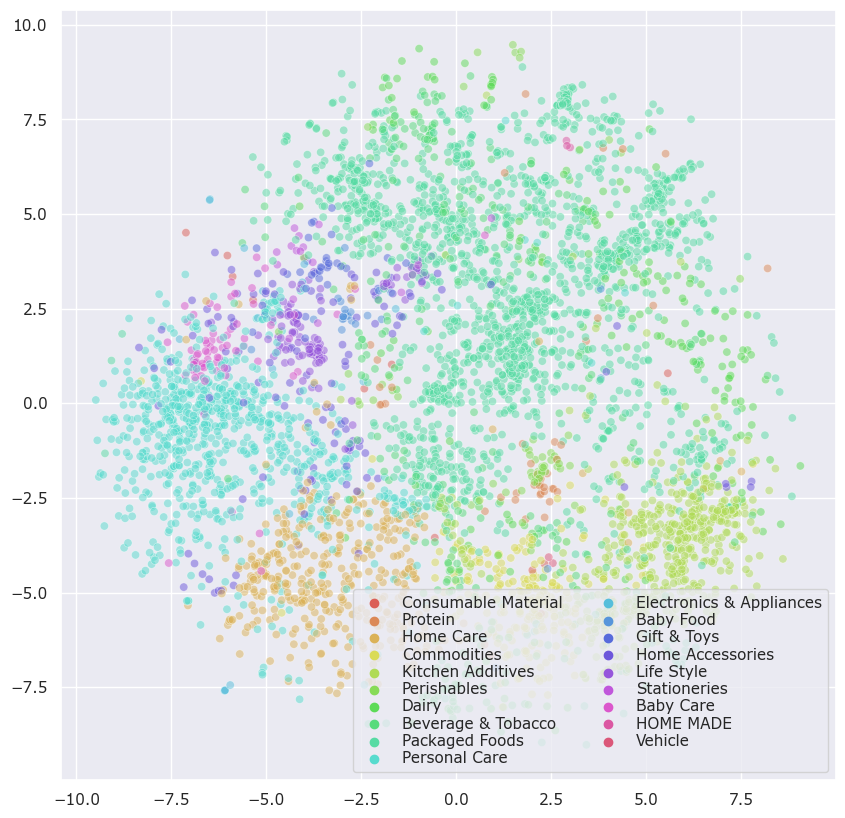

In [71]:
#
# Visualize the entire semantic space and its mapping to the departments
#
# df_semantic_item.rename(columns={'categ': 'Department'}, inplace=True)
plt.figure(figsize=(10, 10));
sns.set_context("paper", font_scale = 2.4);
sns.set(font='Verdana')
# sns.set_style({'font.family':'Times', 'font.serif':['Times']});
g = sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue='Category',
    palette=sns.color_palette("hls", n_category),
    data=df_semantic_item,
    legend="full",
    alpha=0.5
);
g.set(xlabel=None);
g.set(ylabel=None);
plt.legend(loc='lower right', labelspacing=0.15, ncol=2)
g.figure.savefig("item_space_tsne.pdf");
plt.show();

Products in the selected SubCategorys: 911


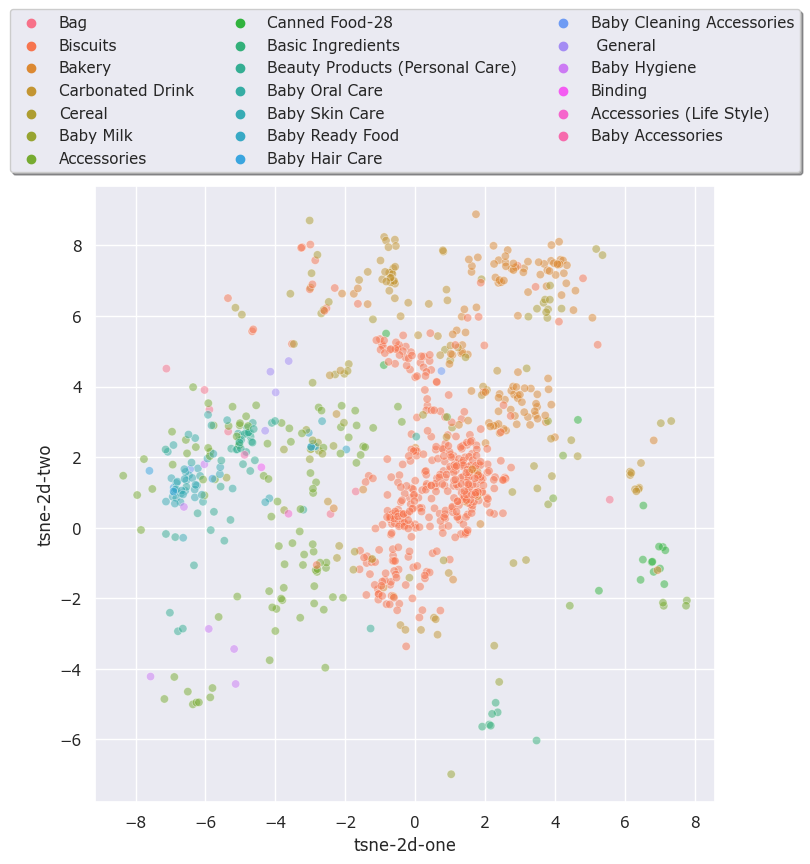

In [90]:

# Visualize the mapping between the semantic space and aisles

subcategory_list = sorted(df_semantic_item['SubCategory'].unique())
subcategory_set = subcategory_list[:20]   # take a subset of aisles to keep it readable

print(f'Products in the selected SubCategorys: {df_semantic_item[df_semantic_item.SubCategory.isin(subcategory_set)].shape[0]}')
fig = plt.figure(figsize=(8, 8))
ax = sns.scatterplot(
   x="tsne-2d-one", y="tsne-2d-two",
   hue='SubCategory',
   data=df_semantic_item[df_semantic_item.SubCategory.isin(subcategory_set)],
   legend="auto",
   alpha=0.5
)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),
          ncol=3, fancybox=True, shadow=True)
plt.show()
fig.savefig('Subcategory1.png', dpi=1200, bbox_inches='tight')

# Step 6: Compare the Original Semantic Space and Its t-SNE Projection

In this section, we compare the original (200 dimensional) semantic space with its t-SNE projection.

We demonstrate that rhe high-dimensional semantic space is better aligned with traditional labels (department, asile) than t-SNE projection. More basic projection methods provide event worse results - the SVD projection below is not aligned with the labels at all. However, the aligment between the traditional labels and semantic space is very weak (negative silhouette scores) anyways. This does not mean that the semantic space has no meanigful structure - the structure is just different from product depertment taxonomy. We study the strucutre in mode detail in Customer2Vec model.  

In [91]:
from sklearn.metrics import silhouette_samples, silhouette_score

for space_name, space in {'TSNE': tsne_results, 'raw latent space': model.wv.vectors}.items():
    for entity in ['Category', 'SubCategory']:
        silhouette_avg = silhouette_score(space, df_semantic_item[entity], metric="cosine")
        print(f"The number of unique {entity}s is {df_semantic_item[entity].nunique()} " +\
              f"and the average silhouette_score on {space_name} is : {silhouette_avg:.4}")

The number of unique Categorys is 19 and the average silhouette_score on TSNE is : -0.4441
The number of unique SubCategorys is 68 and the average silhouette_score on TSNE is : -0.6765
The number of unique Categorys is 19 and the average silhouette_score on raw latent space is : -0.04875
The number of unique SubCategorys is 68 and the average silhouette_score on raw latent space is : -0.1012


<Figure size 576x576 with 0 Axes>

<AxesSubplot:xlabel='svd-2d-one', ylabel='svd-2d-two'>

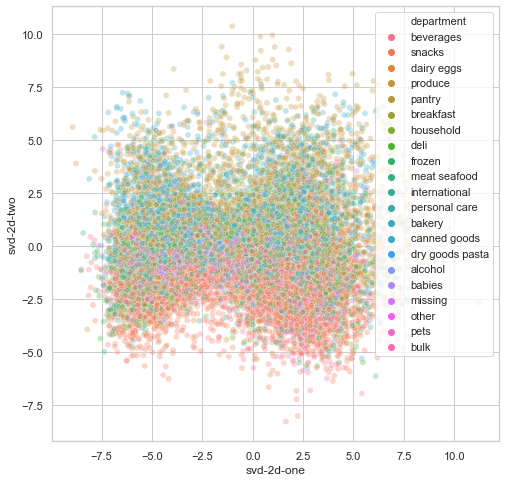

In [43]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
X_reduced = svd.fit_transform(X)

df_svd = pd.DataFrame({'ProductCode': vocab})
df_svd['svd-2d-one'] = X_reduced[:,0]
df_svd['svd-2d-two'] = X_reduced[:,1]
df_svd['ProductCode'] = df_svd['ProductCode'].astype(int)

df_svd = df_svd.merge(data_dict['products'], on='ProductCode', how='left')
df_svd = df_svd.merge(data_dict['SubCategory'], on='SubCategoryID', how='left')
df_svd = df_svd.merge(data_dict['category'], on='CategoryID', how='left')

plt.figure(figsize=(8, 8))
sns.scatterplot(
        x="svd-2d-one", y="svd-2d-two",
        hue='category',
        data=df_svd,
        legend="full",
        alpha=0.3
    )
plt.show()